_____

## Прогнозирование оттока клиентов телекоммуникационной компании

_____

С целью удержания клиентов Оператор связи **«Ниединогоразрыва.ком»** хочет научиться прогнозировать клиентский отток. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия.

Оператор предоставляет два основных типа услуг: 

1.	Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2.	Интернет-услуги. Интернет-подключение, в свою очередь, может быть двух типов:
  - через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия»)
  -  или оптоволоконный кабель (Fiber optic)

Дополнительно компания предоставляет такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

«Ниединогоразрыва.ком» собрали и любезно предоставили в наше распоряжение обезличенные персональные данные о некоторых клиентах. Эти данные представляют собой файлы, скомпилированные из различных источников:

- ```contract_new.csv``` — информация о договоре;
- ```personal_new.csv``` — персональные данные клиента;
- ```internet_new.csv``` — информация об интернет-услугах;
- ```phone_new.csv``` — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.
Информация о договорах актуальна на 1 февраля 2020 года

$\Rightarrow$ наша цель - создание ML-модели, способной находить клиентов, склонных к оттоку. 

_____

Для решения задачи прогнозирования клиентского оттока мы разработаем модель машинного обучения, которая будет находить и отмечать тех клиентов, что в потенциале попадают в отток, т.е. решать задачу бинарной классификации. Для создания качественной ML-модели, соответствующей требованиям заказчика мы будем придерживаться следующих шагов:

1)
Изучим и подготовим для машинного обучения предоставленные нам данные. На этом этапе важно:
  - разобраться в схемах данных, проверить типы данных на соответствие содержимому
  - найти и обработать возможные аномалии или выбросы. К сожалению, прямой связи с сотрудниками «Ниединогоразрыва.ком» у нас нет, так что при принятии решений будем руководствоваться своей экспертностью и открытыми интернет-источниками
  - найти и обработать пропуски в данных, если они будут
  - опционально: сгенерировать новые признаки, которые помогут ML-модели укрепить взаимосвязь между данными и целевой переменной

2)
Создадим несколько видов ML-моделей, основанных на разных алгоритмах. Нам известно о том, что заказчик хочет понимать основную логику работы модели, поэтому при выборе алгоритмов важным критерием будет являться тот факт, что модель должна получиться интерпретируемой, т.е. в результате её работы мы должны уметь находить и понимать взаимосвязь признаков и целевой переменной-таргета. По этой причине нейросетевые модели нам не подходят, но есть ряд других хорошо зарекомендовавших себя алгоритмов. Попробуем рассмотреть некоторые из них, к примеру:
  - пару "деревянных" - случайнывй лес и градиентный бустинг
  - линейный - логистическую регрессию или SVC
  - соседский KNN

3) 
Выберем лучший алгоритм. В качестве ключевой метрики оценки предсказания алгоритма будем использовать **ROC-AUC** (Receiver Operating Characteristic - Area Under the Curve) - эта метрика оценивает способность модели разделять классы и предсказывать вероятности принадлежности объектов к тому или иному классу. Формула ROC-AUC для бинарной классификации выглядит так:

$$\text{ROC-AUC} = \frac{(1 + TPR - FPR)}{2}$$

![fpr_tpr2.md.jpg](https://ltdfoto.ru/images/2023/08/29/fpr_tpr2.md.jpg)

**TPR** (True Positive Rate) - это доля верно классифицированных положительных объектов к общему числу положительных объектов

**FPR** (False Positive Rate) - это доля неверно классифицированных отрицательных объектов к общему числу отрицательных объектов

Преимущества **ROC-AUC** в том, что она:
- не зависит от порога принятия решения и позволяет оценить качество модели в целом.
- устойчива к дисбалансу классов.
- хорошо подходит для сравнения разных моделей между собой. 

значение **ROC-AUC** должно получиться не ниже 85%

Для дополнительной оценки качества рассмотрим также метрику **Accuracy** (точность) - она измеряет долю правильно классифицированных объектов по отношению ко всем объектам и вычисляется путём деления числа правильно классифицированных объектов на общее количество объектов.

$$Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$$

В то время как ROC-AUC оценит способность модели разделять классы и предсказывать вероятности, Accuracy измерит общую точность предсказаний модели $\Rightarrow$ использование двух метрик позволит нам получить более полное представление о качестве разработанной модели.

4) 
После выбора подходящего алгоритма дополительно исследуем данные и постараемся ранжировать признаки по степени их влияния на целевую переменную. Для этого используем инструменты библиотеки **SHAP** (SHapley Additive exPlanations), которые позволяют объяснять предсказания модели на основе концепции вклада Шэпли (вот интересная [статья](https://chernobrovov.ru/articles/interpretiruj-eto-metod-shap-v-data-science.html) о нём) и визуализировать важность признаков

5) 
Получим предсказание и посчитаем метрики на подготовленной заранее контрольной выборке, представляющей собой 25% от имеющихся данных

6) 
Подведём общий итог проделанной работе:
  - сверимся с изначальным планом и проверим, что из него получилось, а какие шаги в процессе работы были откорректированы
  - в качестве финального отчёта подготовим описание выбранной модели машинного обучения и аргументы в пользу выбора именно этой модели
  - отдельно опишем все те особенности в данных, с которыми столкнёмся в процессе их исследования и подготовки модели

7) 
При реализации всех намеченных этапов мы будем стараться придерживаться бизнес-логики, заключающейся в желании «Ниединогоразрыва.ком» научиться прогнозировать клиентский отток. Очевидно, что желание это продиктовано потребностью в удержании денежных средств, которые теряются вместе с уходом клиентов. Компания должна знать свой отток и уметь эффективно контролировать его. Конечно, определённая доля потери клиентов - это явление вполне естественное для живого бизнеса. Но наша задача, помимо оперативного нахождения и маркировки пользователей, склонных к оттоку, заключается и в выявлении причин оттока или клиентских групп, склонных к нему. Прицельная работа над этими причинами или пользовательскими группами позволит оператору связи удержать определённую долю клиентов и тем самым сохранить свой доход. 

_____

## Подготовка данных

импортируем все необходимые библиотеки и модули:

In [1]:
# !pip install colorama phik xgboost slicer shap cowsay
# !pip install -U -q scikit-learn
# !pip install -U -q matplotlib
# !pip install -U -q seaborn
# !pip install --upgrade scikit-learn

In [2]:
from datetime import datetime
import os
import warnings

import cowsay
import joblib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
import phik
import shap

import scipy.stats as stats

from catboost import CatBoostClassifier
from colorama import Fore, Style

from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='Set2')
warnings.filterwarnings('ignore')
RANDOM_STATE = 280823

Техническая часть работы - все классы, функции и пр. рабочие части кода соберём в одном месте здесь наверху, так общий код исследования будет выглядеть аккуратнее:

In [3]:
def get_info(df, get_plot=False):
    """
    функция выводит обзорную статистику по датафрейму и отрисовывает графики по признакам:
    - для признаков типа int гистограмму
    - для признаков типа object круговую диаграмму
    """

    s_br, s_reset = Style.BRIGHT, Style.RESET_ALL
    try:
        print(f'{s_br}ДАТАСЕТ {df.name}{s_reset}\n')
    except AttributeError:
        pass
    print(f'размер:{df.shape}')
    display(df.head(3), df.tail(3), df.describe().T)

    num_cols, cat_cols, date_cols = [], [], []
    for num, i in enumerate(df.columns):
        if pd.api.types.is_datetime64_any_dtype(df[i]):
            print(f'{num+1}) {s_br}{i}{s_reset} (тип дата), оригинальных значений: {len(df[i].unique())}')
            date_cols.append(i)
        elif pd.api.types.is_numeric_dtype(df[i]):
            print(f'{num+1}) {s_br}{i}{s_reset} (тип число), оригинальных значений: {len(df[i].unique())}')
            num_cols.append(i)
        elif pd.api.types.is_object_dtype(df[i]):
            print(f'{num+1}) {s_br}{i}{s_reset} (тип строка), оригинальных значений: {len(df[i].unique())}')
            cat_cols.append(i)
    print(f'\n{s_br}итого:{s_reset}\nтип число: {len(num_cols)}\nтип строка: {len(cat_cols)}\nтип дата: {len(date_cols)}\n'
          f'\n{s_br}пропуски:{s_reset}\n{df.isna().sum()}\n\n{s_br}дубликатов:{s_reset} {df.duplicated().sum()}')

    if df.name in ['contract', 'internet']:
        nrows, ncols = 2, 4
    elif df.name == 'personal':
        nrows, ncols = 2, 2
    else:
        nrows, ncols = 1, 1

    if df.name not in ['contract', 'internet', 'personal']:
        fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4, 4))
    else:
        fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 6))
    fig.suptitle(f'Распределение значений признаков в {df.name}', fontsize=16, fontweight='bold')
    ax_flat = np.ravel(ax)

    if nrows > 1 and ncols > 1:
        if df.name in ['contract', 'internet']:
            ax_flat[-1].set_visible(False)

    for num, col_name in enumerate(df.columns.drop('customer_id')):
        if nrows > 1 or ncols > 1:
            row = num // ncols
            col = num % ncols
        else:
            row, col = 0, 0

        if col_name in num_cols:
            ax_flat[num].hist(df[col_name].dropna(), bins=20)
            ax_flat[num].set_xticks([])
            ax_flat[num].set_yticks([])
        else:
            counts = df[col_name].dropna().value_counts()
            if counts.nunique() <= 5:
                wedges, texts, autotexts = ax_flat[num].pie(counts.values.tolist(), startangle=90,
                                                             wedgeprops={'linewidth': .7, 'edgecolor': 'white'},
                                                             autopct='%1.1f%%', textprops={'fontsize': 8})
                for text, autotext, count in zip(texts, autotexts, counts.values.tolist()):
                    text.set_text(counts.index[counts.values.tolist().index(count)])
                    autotext.set_text(f'{count/len(df)*100:.1f}%')
            else:
                ax_flat[num].pie(counts.values.tolist(), startangle=90,
                                 wedgeprops={'linewidth': .7, 'edgecolor': 'white'})
        ax_flat[num].set_title(col_name)

    plt.subplots_adjust(hspace=.5, wspace=.3)
    plt.show()


def transform_df(df):
    """функция приводит названия полей к стилю snake_case, а значения строковых типов форматирует в lower"""

    df_ = df.copy()
    for i, s in enumerate(df_.columns):
        if any(x.isupper() for x in s):
            s = ''.join(['_' + c.lower() if c.isupper() and (i==0 or not s[i-1].isupper()) else c for i, c in enumerate(s)]) \
                .lstrip('_').lower()
        df_ = df_.rename(columns={df_.columns[i]: s})

    df_[df_.select_dtypes(include=['object']).columns] =\
        df_[df_.select_dtypes(include=['object']).columns].apply(lambda x: x.str.lower())

    return df_


def get_barplot(df, col, title):
    """функция для отрисовки столбчатой диаграммы по календарным месяцам"""

    df_ = df.copy()
    df_.loc[col] = pd.to_datetime(df_[col], format='%Y-%m-%d')
    counts = df_[col].dt.to_period('M').value_counts().sort_index()

    plt.figure(figsize=(12, 5))
    sns.barplot(x=counts.index.strftime('%Y-%m'), y=counts.values, color='#4746e9', alpha=0.9)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('месяц')
    plt.ylabel('количество')
    plt.tick_params(axis='x', labelsize=8.5)
    plt.xticks(rotation=90)
    plt.minorticks_on()
    plt.grid(which='major', linewidth=.5)
    plt.grid(which='minor', linewidth=.25, linestyle='--');


def dynamics_in_services(df):
    """функция для отрисовки изменения продажи доп.услуг по дате подключения"""

    df_ = df.copy()
    colors = ['#DE3163', '#CCCCFF', '#FF7F50', '#6495ED', '#FFBF00', '#40E0D0', '#85929E']
    services = ['multiple_lines', 'online_security', 'online_backup', 'device_protection',
                'tech_support', 'streaming_tv', 'streaming_movies']
    df_services = df_.groupby('begin_date')[services].apply(lambda x: (x == 'yes').sum())
    fig, ax = plt.subplots(figsize=(12, 4))
    df_services.plot(ax=ax, color=colors)
    ax.set_title('Изменение количества услуг в зависимости от даты подключения', fontsize=16, fontweight='bold')
    ax.set_xlabel('дата подключения')
    ax.set_ylabel('количество услуг')
    ax.legend(services, facecolor='oldlace', edgecolor='#7B6DA5', loc='upper center', fontsize='x-small')
    ax.minorticks_on()
    ax.grid(which='major', linewidth=.5)
    ax.grid(which='minor', linewidth=.25, linestyle='--');


def get_corr_matrix(matrix, correlation_threshold=0.3):
    "функция отрисовывает корреляционную матрицу на тепловой карте"

    sns.set(font_scale=0.75)
    sns.set_style("white")
    plt.figure(figsize = (12, 8))
    cmap = mcolors.LinearSegmentedColormap.from_list('my_palette', ['#C5E2F4', '#3E60EA'])

    matrix = matrix.round(2)
    matrix[np.abs(matrix) < correlation_threshold] = 0
    mask = np.zeros_like(matrix)
    mask[np.triu_indices_from(mask)] = True

    ax = sns.heatmap(matrix, annot=True, linewidths=.3, cmap=cmap, mask=mask, annot_kws={"size": 8})
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
    plt.title('корреляционная матрица', fontweight='bold', fontsize=14);


def get_hist(col, bins=20):
    """
    функция строит гистограмму распределения на заданное количество бинов
    дополнительно отрисовываются 3 линии на распределении - среднее, медиана и мода
    """

    mean_ = col.mean()
    median_ = col.median()
    best_ = col.value_counts().idxmax()

    plt.figure(figsize=(12, 4))
    plt.title(f"Распределение в {col.name}", fontsize=16, fontweight='bold')
    sns.histplot(col, kde=True, color='#5c75de', ec='#3453D6', bins=bins)
    plt.ylabel('количество')

    plt.axvline(x=mean_, label=f'среднее={int(mean_)}', lw=1.5, c='#8A2BE2')
    plt.axvline(x=median_, label=f'медиана={int(median_)}', lw=1.5, c='#228B22')
    plt.axvline(x=best_, label=f'мода={int(best_)}', lw=1.5, c='#FF4500')
    plt.legend(facecolor='oldlace', edgecolor='#7B6DA5')

    plt.minorticks_on()
    plt.grid(which='major', linewidth=.5)
    plt.grid(which='minor', linewidth=.25, linestyle='--');


def plot_barh(table):
    """функция отрисовывает таблицу с предсказанием ROC_AUC на тренировочной выборке"""

    plt.figure(figsize=(12, 7))

    model_names = table[table.columns[0]].tolist()
    roc_values = table[table.columns[2]].tolist()

    bars = plt.barh(range(len(model_names)), roc_values, color='#8398f1', ec='#3e60ea', alpha=0.7, height=0.5)
    plt.yticks(range(len(model_names)), model_names[::-1])
    plt.title('Результаты по значению ROC_AUC на кросс-валидации тренировочной выборки', fontweight='bold', fontsize=16)
    plt.grid(axis='y', linewidth=.5)

    for i, bar in enumerate(bars):
        plt.text(bar.get_width() - 0.2, bar.get_y() + bar.get_height() / 2,
                 f'ROC_AUC = {round(roc_values[::-1][i], 4)}', ha='left', va='center', fontsize=10)
    plt.minorticks_on()
    plt.grid(which='major', linewidth=.5)
    plt.grid(which='minor', linewidth=.25, linestyle='--')

    plt.show()

In [4]:
def comparison_of_distribution_across_datasets(data, features, name_decoding, inputColunm='label', alpha=0.05):
    """
    функция отрисовывает распределение значений признаков для:
    label=1 - оттока
    label=0 - активных пользователей
    для признаков, значений в которых >60, значения собираются в группы по 10 бинов
    дополнительно проволятся стат.тесты на проверку гипотезы H0 об отсутствии влияния на таргет
    для категориальных признаков проводится хи-квадрат, а для числовых t-тест для независимых выборок
    """
    
    df_ = data.copy()
    churned_customers, churned_customers.name = df_[df_[inputColunm] == 1], 'churned_customers'
    active_customers, active_customers.name = df_[df_[inputColunm] == 0], 'active_customers'
    print('датасет разбит на два:')
    for i in [churned_customers, active_customers]:
        print(f'{Fore.CYAN}{Style.BRIGHT}датасет {i.name}{Style.RESET_ALL}\n\t'
              f'размер = {i.shape}\n\tпропусков в данных: {i.isna().sum().sum()}')
    
    for i in range(len(features)):

        # распределение значений для клиентов
        churned_values = churned_customers[features[i]].value_counts(normalize=True)
        active_values = active_customers[features[i]].value_counts(normalize=True)

        # проверка гипотезы:
        #    H0 - признак не влияет на таргет
        #    H1 - признак влияет на таргет
        if isinstance(df_[features[i]].iloc[0], str):
            _, p_value = stats.chisquare(churned_values.values, active_values.values) # строка
        else:
            _, p_value = stats.ttest_ind(df_[features[i]], active_customers[features[i]]) # число
        if p_value < 0.05:
            significance = f'{p_value=:.4f}, т.е. < {alpha=:.0%} ==> статистически признак ВЛИЯЕТ на отток'
        else:
            significance = f'{p_value=:.4f}, т.е. > {alpha=:.0%} ==> статистически признак НЕ ВЛИЯЕТ на отток'

        rotation_ = 0
        # если количество уникальных значений в признаке > 60, то группируем значения в интервалы
        if churned_values.shape[0] > 60 or active_values.shape[0] > 60:
            churned_values = pd.cut(churned_customers[features[i]], bins=10).value_counts(normalize=True)
            active_values = pd.cut(active_customers[features[i]], bins=10).value_counts(normalize=True)
            rotation_ = 90

        # ну и русуем в цикле, каждый признак в свою фигуру:
        plt.figure(figsize=(12, 3.5))

        plt.bar(churned_values.index.astype(str), churned_values.values, alpha=0.85,
                label='Отток', color='#E74C3C', width=0.4)
        plt.bar(active_values.index.astype(str), active_values.values, alpha=0.75,
                label='Активные', color='#3498DB', width=0.5)

        plt.ylabel('доля')
        plt.title(f'Распределение для {features[i]} - {name_decoding[i]}\n{significance}', fontweight='bold')
        plt.legend(facecolor='oldlace', edgecolor='#7B6DA5')

        plt.xticks(rotation=rotation_)
        plt.minorticks_on()
        plt.grid(which='major', linewidth=.5)
        plt.grid(which='minor', linewidth=.25, linestyle='--')


def class_distribution_plot(col):
    """функция рисует столбчатый график распределения классов"""

    plt.figure(figsize=(12, 3))
    unique, counts = np.unique(col, return_counts=True)
    plt.bar(unique, counts, color='#8398f1', ec='#3e60ea')
    plt.xticks(unique)
    plt.xlabel('класс')
    plt.ylabel('количество наблюдений')
    plt.title(f'распределение классов\nдоля единиц {sum(col == 1)/sum(col == 0):.2%}',
              fontweight='bold', fontsize=16)
    plt.grid(axis='y', linewidth=.5);


def return_model_for_shap(X, y, model, rs=RANDOM_STATE):
    """финкция отрисовывает SHAP-график влияния признаков на отток"""

    X_ = X.copy()
    categorical_cols = X_.select_dtypes(include=['object']).columns.tolist()
    other_cols = X_.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()

    X_encoded_df = pd.get_dummies(X_[categorical_cols])
    X_ = pd.concat([X_encoded_df, X_[other_cols]], axis=1)

    explainer = shap.TreeExplainer(model.fit(X_, y))
    preds_train = model.predict_proba(X_)[:, 1]
    shap_values_all = explainer.shap_values(X_)
    shap.summary_plot(shap_values_all, X_, plot_size=(13, 8))


def model_comparison(X_train, y_train, X_test, y_test, model_prediction, strategy='most_frequent'):
    """функция находит предсказание dummy-модели по заданной стратегии и отрисовывает столбчатый график с подписью значений"""

    dummy_clf = DummyClassifier(strategy=strategy)
    dummy_clf.fit(X_train, y_train)
    dummy_pred = dummy_clf.predict(X_test)
    dummy_prediction = (accuracy_score(y_test, dummy_pred), roc_auc_score(y_test, dummy_pred))
    dummy_prediction_rounded = np.round(dummy_prediction, 3)
    model_prediction_rounded = np.round(model_prediction, 3)

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(x=[0], height=[model_prediction[0]], label='Модель: Accuracy', alpha=0.8, color='#17A589', ec='#117864')
    ax.bar(x=[1], height=[model_prediction[1]], label='Модель: ROC_AUC', alpha=0.8, color='#2E86C1', ec='#21618C')
    ax.bar(x=[3], height=[dummy_prediction[0]], label='Dummy: Accuracy', alpha=0.8, color='#D4AC0D', ec='#9A7D0A')
    ax.bar(x=[4], height=[dummy_prediction[1]], label='Dummy: ROC_AUC', alpha=0.8, color='#CA6F1E', ec='#935116')

    for i, value in enumerate(model_prediction_rounded):
        ax.text(i, model_prediction[i], str(value), ha='center', va='bottom')
    for i, value in enumerate(dummy_prediction_rounded):
        ax.text(i+3, dummy_prediction[i], str(value), ha='center', va='bottom')

    ax.set_xticks([0, 1, 3, 4], ['Accuracy', 'ROC_AUC', 'Accuracy', 'ROC_AUC'])
    plt.legend(facecolor='oldlace', edgecolor='#7B6DA5', loc='lower center')
    plt.title(f'Сравнение предсказаний модели и dummy-модели,\nстратегия: {strategy}', fontweight='bold', fontsize=16)
    plt.minorticks_on()
    plt.grid(which='major', linewidth=.5)
    plt.grid(which='minor', linewidth=.25, linestyle='--');

In [5]:
class GetFinalTable:
    """класс в конструкторе заполняет финальную сводную таблицу"""

    pivot_table = pd.DataFrame(columns=['модель', 'Accuracy', 'ROC_AUC на train при cross validation', 'ROC_AUC на test'])

    def __init__(self, name_model, acc, roc_train, roc_test=''):
        self.model = name_model
        self.acc = acc
        self.roc_train = roc_train
        self.roc_test = roc_test

        GetFinalTable.pivot_table.loc[len(GetFinalTable.pivot_table)] =\
            [self.model, self.acc, self.roc_train, self.roc_test]


class ModelAnalyzer(GetFinalTable):
    """
    класс в конструкторе хранит списки категориальных и других переменных
    наследуется от GetFinalTable, так как заполняет его атрибут pivot_table
    в методах ModelAnalyzer формируется и возвращается предсказание, отрисовываются графики
    тепловой карты матрцы ошибок и ROC curve как зависимость между TPR и FPR
    """

    def __init__(self):
        self.categorical_cols = []
        self.other_cols = []

    
    def plot_confusion_matrix(self, cnf_matrix, y_, preds=None):
        """метод для отрисовки confusion_matrix и ROC-кривой"""

        cmap = sns.light_palette('#3e60ea', '#738bef', as_cmap=True)

        if preds is not None:
            fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
            ax1, ax2 = ax.flatten()

            sns.heatmap(cnf_matrix, annot=True, cmap=cmap, fmt='g', linewidths=5, vmin=10, ax=ax[0])
            ax1.set_xlabel('предсказанные значения')
            ax1.set_ylabel('истинные значения')
            ax1.set_title(f'матрица ошибок\n[TN, FP]\n[FN, TP]')

            fpr, tpr, thresholds = roc_curve(y_, preds)
            roc_auc = auc(fpr, tpr)
            ax2.plot(fpr, tpr, color='#738bef', lw=2, label=f'ROC curve (S={roc_auc:.2f})')
            ax2.plot([0, 1], [0, 1], color='#3e60ea', lw=2, linestyle='--')
            ax2.set_xlim([.0, 1.])
            ax2.set_ylim([.0, 1.05])
            ax2.set_xlabel('FPR', fontweight='bold')
            ax2.set_ylabel('TPR', fontweight='bold')
            ax2.set_title('ROC-кривая')
            ax2.legend(facecolor='oldlace', edgecolor='#7B6DA5', loc='lower right')
            ax2.spines['top'].set_visible(False)
            ax2.spines['right'].set_visible(False)
            ax2.get_xaxis().tick_bottom()
            ax2.get_yaxis().tick_left()
            ax2.grid(linewidth=.25);
        else:
            plt.figure(figsize=(4.5, 3.75))
            sns.heatmap(cnf_matrix, annot=True, cmap=cmap, fmt='g', linewidths=5, vmin=10)
            plt.xlabel('предсказанные значения')
            plt.ylabel('истинные значения')
            plt.title(f'матрица ошибок\n[TN, FP]\n[FN, TP]')
            plt.tight_layout();


    def get_cross_val_predictions(self, model, X, y, cv=6):
        """
        метод использует cross_val_predict для получения предсказаний модели на каждом фолде 
        перекрестной валидации и передаёт их в метод plot_confusion_matrix для построения матрицы ошибок и ROC-кривой
        """
        
        y_pred = cross_val_predict(model, X, y, cv=cv, method='predict')
        y_pred_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
        cnf_matrix = confusion_matrix(y, y_pred)
        self.plot_confusion_matrix(cnf_matrix, y, preds=y_pred_proba)


    def choosing_best_model(self, model, X, y, param_grid, cv=6, n_iter=200, rs=RANDOM_STATE, polynomial_degree=1,
                            standardize=False, X_test=False, y_test=False, stack=False):
        """
        метод формирует пайплайн, передаёт его RandomizedSearchCV, по сетке находит лучшие гиперпараметры,
        возвращает предсказания и экземпляр класса GetFinalTable, который дописывает в конец сводной таблицы,
        содержащей название алгоритма с лучшими параметрами и замеры метрик
        """

        if X_test is not False:

            y_pred_Xtest = model.predict(X_test)
            y_pred_Xtest_proba = model.predict_proba(X_test)[:, 1]
            acc = accuracy_score(y_test, y_pred_Xtest)
            auc = roc_auc_score(y_test, y_pred_Xtest_proba)

            table_row = GetFinalTable(str(model[-1]), acc, '', auc)
            self.get_cross_val_predictions(model=model, X=X_test, y=y_test)

            return table_row, y_pred_Xtest
        else:
            if standardize:
                preprocessor = ColumnTransformer(
                    transformers=[
                        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), self.categorical_cols),
                        ('num', RobustScaler(), self.other_cols)
                    ])
            else:
                preprocessor = ColumnTransformer(
                    transformers=[
                        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), self.categorical_cols),
                        ('num', 'passthrough', self.other_cols)
                    ])
            if stack:
                lr_model = LogisticRegression(random_state=RANDOM_STATE)
                stack_model = StackingClassifier(
                    estimators=[
                        ('model', model),
                        ('lr', lr_model)
                    ],
                    final_estimator=LogisticRegression()
                )
                pipeline = Pipeline([
                    ('preprocessor', preprocessor),
                    ('poly', PolynomialFeatures(degree=polynomial_degree)),
                    ('classifier', stack_model)
                ])
            else:
                pipeline = Pipeline([
                    ('preprocessor', preprocessor),
                    ('poly', PolynomialFeatures(degree=polynomial_degree)),
                    ('classifier', model)
                ])

            grid  = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=cv, scoring='roc_auc',
                                       refit=True, n_iter=n_iter, random_state=rs, n_jobs=-1)

            search = grid.fit(X, y)
            print('---'*10, f'\nподобранные параметры:\n{search.best_params_}\n', '---'*10)
            pipeline.set_params(**search.best_params_)
            pipeline.fit(X, y)
            
            y_pred = pipeline.predict(X)
            acc = accuracy_score(y, y_pred)

            self.get_cross_val_predictions(model=pipeline, X=X, y=y)
            
            table_row = GetFinalTable(str(pipeline[-1]), acc, search.best_score_, '')
            
            return pipeline, table_row, y_pred

_____

загрузим csv-файлы и по отдельности посмотрим на каждый:

In [6]:
try:
    df_contract = pd.read_csv('contract_new.csv')
    df_internet = pd.read_csv('internet_new.csv')
    df_personal = pd.read_csv('personal_new.csv')
    df_phone = pd.read_csv('phone_new.csv')
except FileNotFoundError:
    df_contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')
    df_internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
    df_personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
    df_phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')

приведём названия признаков в к стилю *snake_case*, а сами значения в категориальных признаках приведём в нижнему регистру (вдруг дубли так найдём): 

### df_contract

ДАТАСЕТ contract

размер:(7043, 8)


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-vhveg,2020-01-01,no,month-to-month,yes,electronic check,29.85,31.04
1,5575-gnvde,2017-04-01,no,one year,no,mailed check,56.95,2071.84
2,3668-qpybk,2019-10-01,no,month-to-month,yes,mailed check,53.85,226.17


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
7040,4801-jzazl,2019-03-01,no,month-to-month,yes,electronic check,29.60,325.6
7041,8361-ltmkd,2019-07-01,no,month-to-month,yes,mailed check,74.40,520.8
7042,3186-ajiek,2014-08-01,no,two year,yes,bank transfer (automatic),105.65,7251.82


,count,mean,std,min,25%,50%,75%,max
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


1) customer_id (тип строка), оригинальных значений: 7043
2) begin_date (тип строка), оригинальных значений: 77
3) end_date (тип строка), оригинальных значений: 67
4) type (тип строка), оригинальных значений: 3
5) paperless_billing (тип строка), оригинальных значений: 2
6) payment_method (тип строка), оригинальных значений: 4
7) monthly_charges (тип число), оригинальных значений: 1585
8) total_charges (тип строка), оригинальных значений: 6658

итого:
тип число: 1
тип строка: 7
тип дата: 0

пропуски:
customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64

дубликатов: 0


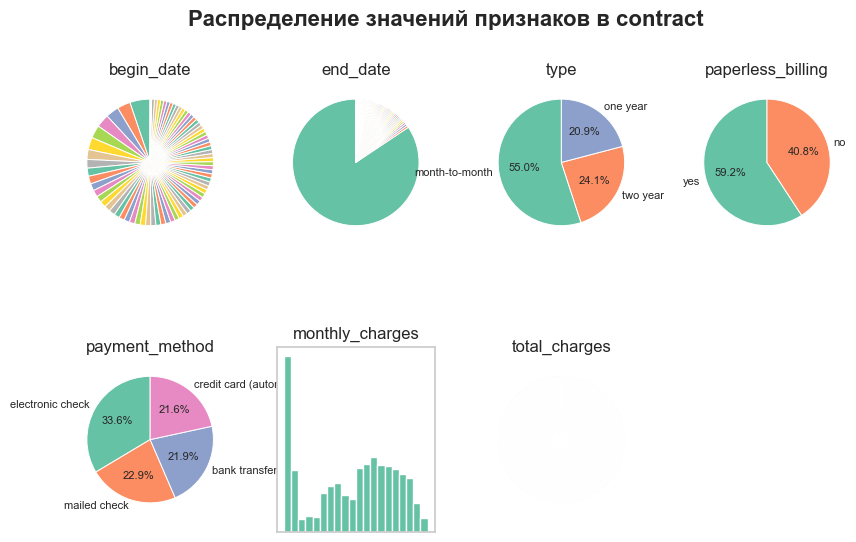

In [7]:
df_contract = transform_df(df_contract)
df_contract.name = 'contract'
get_info(df_contract)

в этом датасете содержится информация о заключённых договорах. Вот что предварительно мы видим:

столбцы:

- ```customer_id``` - id пользователей, количество оригинальных значений совпадает с количеством строк в датасете
- ```begin_date``` - дата начала пользования услугами, всего 77 оригинальных значений и тип не datetime
- ```end_date``` - дата окончания пользования услугами, всего 67 оригинальных значений и тип не datetime
- ```type``` - тип оплаты: ежемесячный, годовой и тд, категория в 3 оригинальных значения
- ```paperless_billing``` - безналичный расчёт, бинарный флаг
- ```payment_method``` - способ оплаты, категория в 4 оригинальных значения
- ```monthly_charges``` - ежемесячные траты на услуги, числовой признак типа float
- ```total_charges``` - всего потрачено денег на услуги, очевидно, что этот принак - типа float, но он сохранён строкой, поэтому его и на графике не видно, так бы гистрограмма построилась, а на круговом графике из-за большого количества строк-значений ничего не видно

пропусков нет, явных дубликатов тоже

### df_internet

ДАТАСЕТ internet

размер:(5517, 8)


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-vhveg,dsl,no,yes,no,no,no,no
1,5575-gnvde,dsl,yes,no,yes,no,no,no
2,3668-qpybk,dsl,yes,yes,no,no,no,no


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
5514,4801-jzazl,dsl,yes,no,no,no,no,no
5515,8361-ltmkd,fiber optic,no,no,no,no,no,no
5516,3186-ajiek,fiber optic,yes,no,yes,yes,yes,yes


,count,unique,top,freq
customer_id,5517,5517,8751-edeka,1
internet_service,5517,2,fiber optic,3096
online_security,5517,2,no,3498
online_backup,5517,2,no,3088
device_protection,5517,2,no,3095
tech_support,5517,2,no,3473
streaming_tv,5517,2,no,2810
streaming_movies,5517,2,no,2785


1) customer_id (тип строка), оригинальных значений: 5517
2) internet_service (тип строка), оригинальных значений: 2
3) online_security (тип строка), оригинальных значений: 2
4) online_backup (тип строка), оригинальных значений: 2
5) device_protection (тип строка), оригинальных значений: 2
6) tech_support (тип строка), оригинальных значений: 2
7) streaming_tv (тип строка), оригинальных значений: 2
8) streaming_movies (тип строка), оригинальных значений: 2

итого:
тип число: 0
тип строка: 8
тип дата: 0

пропуски:
customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64

дубликатов: 0


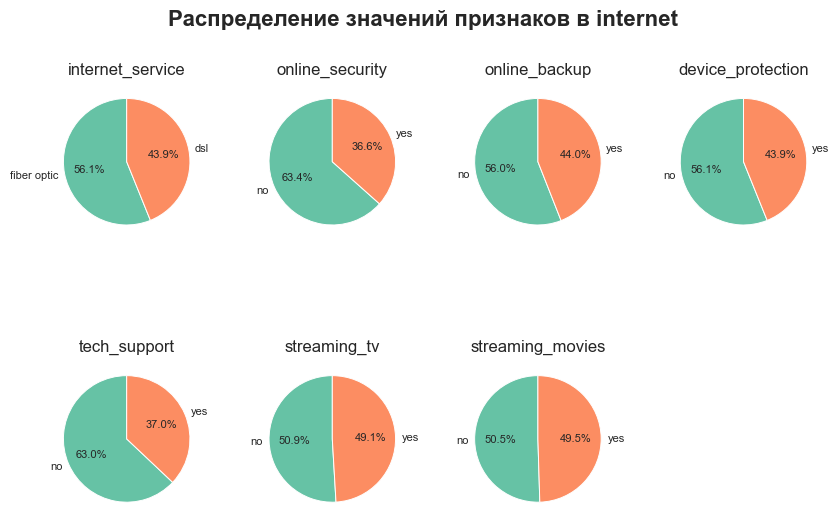

In [8]:
df_internet = transform_df(df_internet)
df_internet.name = 'internet'
get_info(df_internet)

в этом датасете содержится  информация об интернет-услугах. Вот что предварительно мы видим:

столбцы:

- ```customer_id``` - id пользователей, количество оригинальных значений совпадает с количеством строк в датасете

все остальные признаки - бинарные флаги да/нет:

- ```internet_service``` - каким типом интернета пользуются: fiber optic или dsl
- ```online_security``` - подключена ли блокировка небезопасных файлов
- ```online_backup``` - подключено ли облачное хранилище для резервного копирования данных
- ```device_protection``` - подключён ли антивирус
- ```tech_support``` - выделена ли линия технической поддержки
- ```streaming_tv``` - подключено ли стриминговое телевидение
- ```streaming_movies``` - подключён ли онлайн-кинотеатр

пропусков нет, явных дубликатов тоже

### df_personal

ДАТАСЕТ personal

размер:(7043, 5)


,customer_id,gender,senior_citizen,partner,dependents
0,7590-vhveg,female,0,yes,no
1,5575-gnvde,male,0,no,no
2,3668-qpybk,male,0,no,no


,customer_id,gender,senior_citizen,partner,dependents
7040,4801-jzazl,female,0,yes,yes
7041,8361-ltmkd,male,1,yes,no
7042,3186-ajiek,male,0,no,no


,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0


1) customer_id (тип строка), оригинальных значений: 7043
2) gender (тип строка), оригинальных значений: 2
3) senior_citizen (тип число), оригинальных значений: 2
4) partner (тип строка), оригинальных значений: 2
5) dependents (тип строка), оригинальных значений: 2

итого:
тип число: 1
тип строка: 4
тип дата: 0

пропуски:
customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64

дубликатов: 0


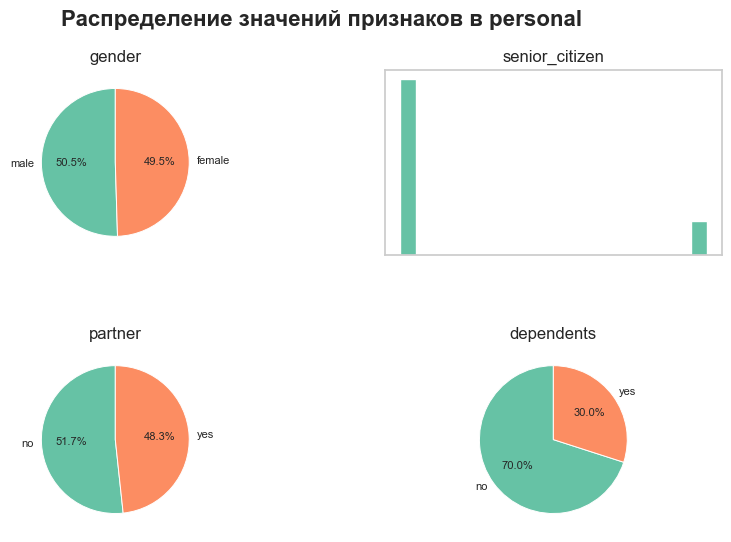

In [9]:
df_personal = transform_df(df_personal)
df_personal.name = 'personal'
get_info(df_personal)

здесь хранятся персональные данные клиентов, такие как:

- ```customer_id``` - id пользователей, количество оригинальных значений совпадает с количеством строк в датасете

все остальные признаки - бинарные флаги:

- ```gender``` - пол, один или второй, третьего не дано
- ```senior_citizen``` - пенсионер ли
- ```partner``` в браке ли
- ```dependents``` - есть ли иждивенцы, что бы это ни значило)) должно быть речь о детях

пропусков нет, явных дубликатов тоже

### df_phone

ДАТАСЕТ phone

размер:(6361, 2)


,customer_id,multiple_lines
0,5575-gnvde,no
1,3668-qpybk,no
2,9237-hqitu,no


,customer_id,multiple_lines
6358,2234-xaduh,yes
6359,8361-ltmkd,yes
6360,3186-ajiek,no


,count,unique,top,freq
customer_id,6361,6361,5687-dkdtv,1
multiple_lines,6361,2,no,3390


1) customer_id (тип строка), оригинальных значений: 6361
2) multiple_lines (тип строка), оригинальных значений: 2

итого:
тип число: 0
тип строка: 2
тип дата: 0

пропуски:
customer_id       0
multiple_lines    0
dtype: int64

дубликатов: 0


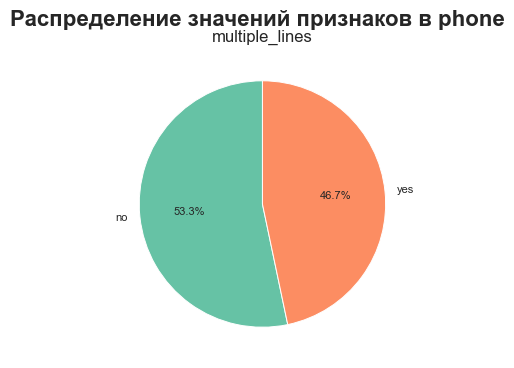

In [10]:
df_phone = transform_df(df_phone)
df_phone.name = 'phone'
get_info(df_phone)

здесь содержится информация об услугах телефонии, а точнее об одной услуге - возможности ведения параллельных линий во время 
звонка. Полей всего два:

- ```customer_id``` - id пользователей, количество оригинальных значений совпадает с количеством строк в датасете

все остальные признаки - бинарные флаги:

- ```multiple_lines``` - бинарный флаг, возможность есть/возможности нет

пропусков нет, явных дубликатов тоже

_____

предварительно информацию в датасетах изучили, обнаружили некоторые неточности в типах данных и неравное количество строк в таблицах. Это объяснимо, так как далеко не всем пользователям нужны такие услуги, как блокировка небезопасных сайтов (должно быть такие отчаянные и небезопасные те, у кого иждивенцев нет)) 

главный обнаруженный плюс заключается в том, что во всех таблицах есть поле ```customer_id```, а значит по нему можно объединить дынные в единый датафрейм и уже дальше с ним работать, что мы и сделаем:

In [11]:
df = df_contract.merge(df_personal, on='customer_id', how='outer') \
    .merge(df_phone, on='customer_id', how='outer') \
    .merge(df_internet, on='customer_id', how='outer')
df.shape

(7043, 20)

In [12]:
display(df.head(3), df.tail(3))

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-vhveg,2020-01-01,no,month-to-month,yes,electronic check,29.85,31.04,female,0,yes,no,NaN,dsl,no,yes,no,no,no,no
1,5575-gnvde,2017-04-01,no,one year,no,mailed check,56.95,2071.84,male,0,no,no,no,dsl,yes,no,yes,no,no,no
2,3668-qpybk,2019-10-01,no,month-to-month,yes,mailed check,53.85,226.17,male,0,no,no,no,dsl,yes,yes,no,no,no,no


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
7040,4801-jzazl,2019-03-01,no,month-to-month,yes,electronic check,29.60,325.6,female,0,yes,yes,NaN,dsl,yes,no,no,no,no,no
7041,8361-ltmkd,2019-07-01,no,month-to-month,yes,mailed check,74.40,520.8,male,1,yes,no,yes,fiber optic,no,no,no,no,no,no
7042,3186-ajiek,2014-08-01,no,two year,yes,bank transfer (automatic),105.65,7251.82,male,0,no,no,no,fiber optic,yes,no,yes,yes,yes,yes


In [13]:
df.isna().sum()

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
multiple_lines        682
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
dtype: int64

с готовым единым датафреймом дальше можно работать. В нём предсказуемо появились пропуски, так как у таблиц было неравное количество строк. Дальше мы с ними обязательно разберёися.

_____

#### Предварительный вывод. На данном этапе мы:

- сфомулировали задачу
- составили план действий по её реализации
- загрузили данные и до предобработки познакомились с ними, посмотрев характеристики и распределение
- выявили несколько ошибочных либо спорных мест в типе полей, дальше будем это исправлять
- объединили данные в единый датасет, с которым и будем работать

$\Rightarrow$ данные загружены, изучены и готовы к предобработке

_____

## Обработка признаков

первым делом подумаем о пропусках. Они появились после обединения таблиц и имеют отношение к различным доп.услугам, которые предоставляет оператор. Вот их сколько:

In [14]:
columns_to_fill = ['multiple_lines', 'internet_service', 'online_security', 'online_backup', \
                   'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

for column in columns_to_fill:
    print(f'{Fore.BLUE}{Style.BRIGHT}{column}{Style.RESET_ALL} - пропусков: {df[column].isna().mean():.2%}')

multiple_lines - пропусков: 9.68%
internet_service - пропусков: 21.67%
online_security - пропусков: 21.67%
online_backup - пропусков: 21.67%
device_protection - пропусков: 21.67%
tech_support - пропусков: 21.67%
streaming_tv - пропусков: 21.67%
streaming_movies - пропусков: 21.67%


можно подумать, что причина пропусков заключается в отсутствии потребности в доп.услугах у интернет-пользователей. Действительно, не всем нужен родительский контроль или онлайн-кинотеатр. Однако:
- ранее при знакомстве с данными мы узнали, что не все доп.услуги ~одинаково полезны~ одинаково популярны и если онлайн-кинотеатром и стриминговым тв пользуется практически половина пользователей, то вот любителей антивируса и персональной поддержки всего по 37%
- при этом мы видим, что для всех доп. услуг доля пропусков одинаковая вплоть до сотой доли процента. Исключение составляет только multiple_lines, но он и взят из другой таблицы, т.е. из своего источника. Такое ровное отсутствие значений не позволяет нам с уверенностью утверждать то, что причина пропусков заключается в отказе от доп. услуг и на самом деле, скорее всего, место имеет какой-то технический сбой
- удалять такое большое количество значений из-за отсутствия отметки в нескольких столбцах дополнительной таблицы было бы неправильным решением

$\Rightarrow$ запишем для себя этот вопрос как требующий уточнения у специалистов компании «Ниединогоразрыва.ком», а пока заполним пропуски отдельной третьей категорий под названием 'No':

In [15]:
df[columns_to_fill] = df[columns_to_fill].fillna('No')

Пропуски убрали, теперь внимательно пройдёмся по всем имеющимся признакам, собрав по каждому информацию:

#### begin_date - дата начала пользования

признак строковый c небольшим количеством значений, а значит в нём под видом строки могут прятаться какие-то неприятные штуки типа некорректных значений, посмотрим на все значения в *begin_date*:

In [16]:
np.sort(df['begin_date'].unique())

array(['2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01',
       '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
       '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01',
       '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01',
       '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
       '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
       '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
       '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
       '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
       '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
       '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
       '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
       '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
       '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
       '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
       '2018-10-01', '2018-11-01', '2018-12-01', '2019-

ничего криминального не обнаружено, только даты типа год-месяц от октября 2013-го до февраля 2020-гогода, довольно грубое приближение даты старта пользования услугами, так как в нём не учтены дни, а значит и модель в маркировке оттока пользователей может научиться ориентироваться на подобные "округления" предсказания. Будем помнить об этой особенности в данных. 

Форматируем *begin_date* из строки в дату и посмотрим на его распределение:

был  тип: df['begin_date'].dtype=dtype('O')
стал тип: df['begin_date'].dtype=dtype('<M8[ns]')


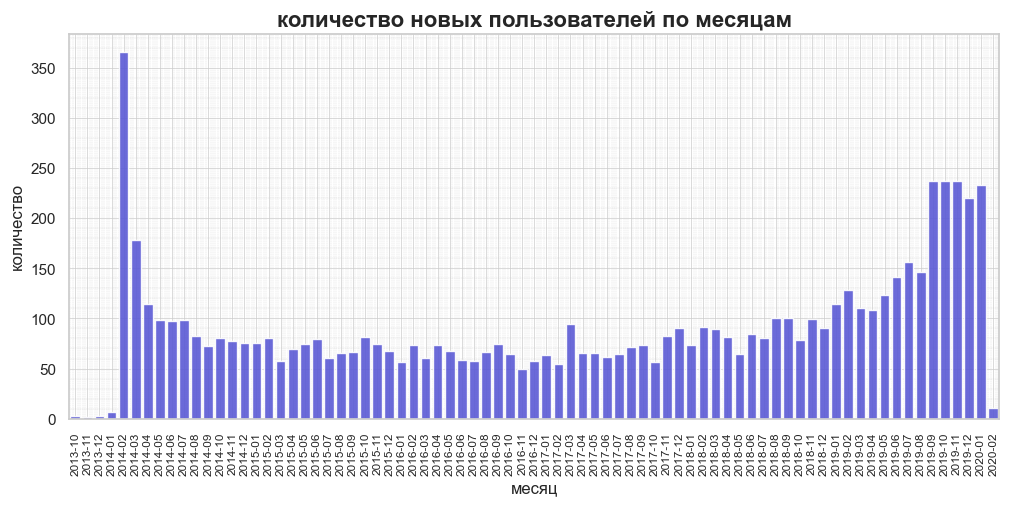

In [17]:
print(f"был  тип: {df['begin_date'].dtype=}")
df['begin_date'] = pd.to_datetime(df['begin_date'], format='%Y-%m-%d')
print(f"стал тип: {df['begin_date'].dtype=}")
get_barplot(df, 'begin_date', title='количество новых пользователей по месяцам')

мы построили гистрограмму с количеством подключений по месяцам и вот что на ней видно:
- февраль и март 2014-го - просто бомбические месяцы, в феврале случился какой-то нездоровый всплеск подключений, переваливший за 350 шт. Стоило бы уточнить у сотрудников Ниединогоразрыва, с чем он связан - с активной рекламной кампанией по случаю их прихода на рынок или это какой-то аномальный выброс
- далее почти 5 лет картинка с количеством новых пользователей практически не меняется и вплоть до января 2019-го года не переходит за планку в >100 новых абонентов в месяц, довольно стабильная, но удручающая ситуация
- с января 2019-го года количество подключений переходит рубеж в >100 новых абонентов в месяц и ниже уже не падает
- с октября 2019-го компания перешагнула за 200+ новых абонентов в месяц

In [18]:
for i in df['begin_date'].value_counts().to_string().split('\n'):
    if '2019-09-' in i or '2019-10-' in i or '2019-11-' in i:
        print(i)

2019-10-01    237
2019-09-01    237
2019-11-01    237


- одинаковое количество новых абонентов в сентябре, октябре и ноябре 2019-го немного настрораживает
- спад подлючений в феврале мы подтвердить не можем, так как у нас данные до 1 февраля включительно. Скорее всего, к нам попали данные всего за 1 день февраля 2020-го

#### end_date - дата окончания пользования услугами

этот столбец очень важен для нас, так как он содержит даты расторжения договора, а значит из него мы сможем вывести таргет, который дальше и будем предсказывать. Посмотрим, какие значения у нас есть:

In [19]:
np.sort(df['end_date'].unique())

array(['2014-06-01', '2014-09-01', '2014-10-01', '2014-11-01',
       '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
       '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
       '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
       '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
       '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
       '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
       '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
       '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
       '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
       '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
       '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
       '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
       '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
       '2019-08-01', '2019-09-01', '2019-10-01', '2019-

пропусков нет, есть только даты в формате год-месяц от июня 2014-го до ноября 2019-го.

создадим товый столбец - целевую переменную *label*, в котором будут значения:
- 0 - клиент не в оттоке
- 1 - клиент в оттоке

а в поле *end_date* заменим значение *no* на дату выгрузки данных = '2020-02-01', переведём его в тип даты и посмотрим на распределение оттока по месяцам:

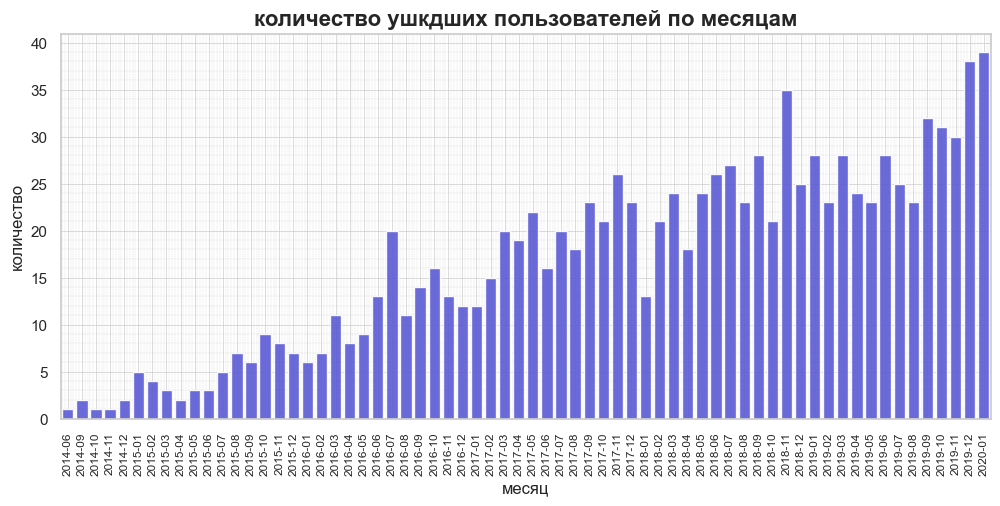

In [20]:
df['label'] = (df['end_date'] != 'no').astype('int')
df.loc[df['end_date'] == 'no', 'end_date'] = '2020-02-01'
df['end_date'] = pd.to_datetime(df['end_date'], format='%Y-%m-%d')

customer_churn = df[df['end_date'] != datetime(2020, 2, 1)]
get_barplot(customer_churn, 'end_date', title='количество ушкдших пользователей по месяцам')

картина с оттоком клиентов удручающая и проблема явно на лицо, с декабря 2019-го года количество потерянных пользователей перевалило за 35 и такого объёма потерь не было за всю историю наблюдений, что есть в нашем распоряжении. Так что опасения Ниединогоразрывцев по поводу клиентского оттока не беспочвенны. 

для полноценного анализа ситуации хоошо бы ещё и конкурентов сравнить, вдруг кто-то в регионе запустил такое супер-предложение, от которого невозможно отказаться, вот пользователи и перетекают к нему. Доступа к конкурентным предложениям у нас нет, так что пойдём от обратного и попробуем разобраться, какой услуги или сервиса у нашего Оператора связи в последне время стало меньше. Возможно то, что снижение продаж какого-то предложения прямо повлияло на рост оттока:

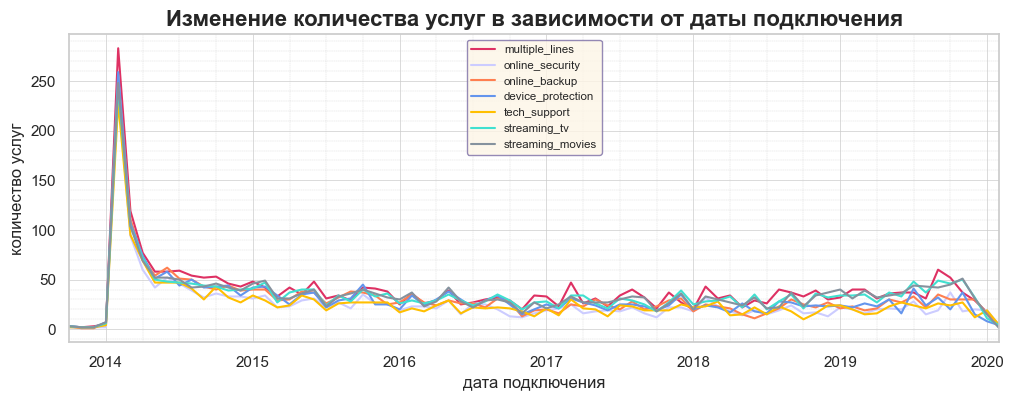

In [21]:
dynamics_in_services(df)

никакого принципиального падения той или иной услуги по годам не видно, некоторые даже в последние месяцы набирают бóльшую популярность (онлайн-кинотеатр, например). Но что точно уже в который раз бросается в глаза, так это нездоровый пик в начале наблюдений. С точки зрения бизнес-логики данные пятилетней давности уже давно потеряли какое-либо значение, да и модель они могут сбить с толку и, ориентируясь на этот пик, она найдёт закономерности там, где их многие годы уже нет.

$\Rightarrow$ оставим наблюдения с мая 2014-го года, убрав аномальный хвост слева + уберём нерелевантные первые записи 1 февраля 2020-го, заодно проверим, много ли мы потеряем данных в результате таких манипуляций:

In [22]:
print(f"отрежем в 2014-м году {df[df['begin_date'] <= datetime(2014, 4, 1)].shape[0]} наблюдений\n"
      f"отрежем в 2014-м году {df[df['begin_date'] >= datetime(2020, 2, 1)].shape[0]} наблюдений") 
new_df = df[(df['begin_date'] > datetime(2014, 4, 1)) & (df['begin_date'] < datetime(2020, 2, 1))].reset_index()
print(f"потеряем {1-new_df.shape[0] / df.shape[0]:.2%} данных")

отрежем в 2014-м году 673 наблюдений
отрежем в 2014-м году 11 наблюдений
потеряем 9.71% данных


отрезали меньше 10% данных, не криминально. Зато выровняли их и можем ещё раз на них посмотреть по графику количества услуг: 

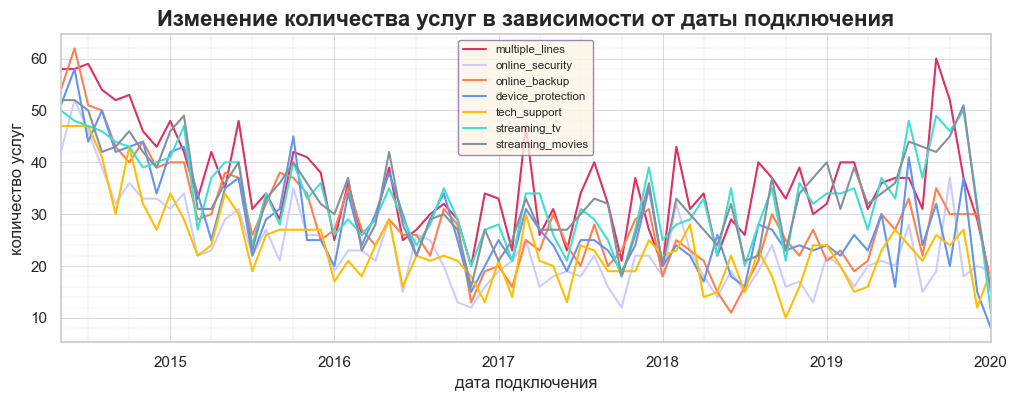

In [23]:
dynamics_in_services(new_df)

график, кстати, подсказывает нам идею о том, что все перечисленные услуги довольно хорошо объясняют друг друга. Этой информацией можно будет как-то воспользоваться в дальнейшем при изучении корреляции признаков

дополнительный "бонус" от обрезания датасета заключается в том, что отрезанные 11 строк февраля 2020-го - это те самые строки, в которых не было указано значение для *total_charges* и из-за котрых всё поле было типа object, а не float как ему положено. Убедимся в том, что это так, и проверим, остались ли в *total_charges* какие-то значения не-строки, что помешают переводу поля в тип float: 

In [24]:
no_int_list = []
for i in new_df.index:
    try:
        float(new_df.iloc[i]['total_charges'])
    except ValueError:
        no_int_list.append(i)
num_ = new_df.iloc[no_int_list].shape[0]
print(f'ничего не мешает, неправильных строк {num_}') if num_ == 0 else (f'ещё мешает {num_} строк')

ничего не мешает, неправильных строк 0


_____

всё в порядке, переводим тип в числовой:

In [25]:
new_df['total_charges'] = new_df['total_charges'].astype('float')

вот и к пенсионерам вопрос - почему, когда все булевые признаки представлены как 'yes'/'no', здесь мы видим числа? похоже, здесь зарыта ошибка. Посмотрим, мколько уникальных значений есть в признаке *senior_citizen* и изменим его тип с числа на строку:

In [26]:
print(f"было:\n{new_df['senior_citizen'].value_counts()}\n")
new_df['senior_citizen'] = new_df['senior_citizen'].map({1: 'yes', 0: 'no'})
print(f"стало:\n{new_df['senior_citizen'].value_counts()}")

было:
0    5326
1    1033
Name: senior_citizen, dtype: int64

стало:
no     5326
yes    1033
Name: senior_citizen, dtype: int64


посмотрим теперь ешё раз на "денежные" признаки. При предварительном знакомстве с распределением значений на 20 бинов в признаке *monthly_charges* было видно что-то похожее на мультимодальность, а распределение в *total_charges* из-за ранее неправильного типа данных мы не видели вовсе - самое время посмотреть:

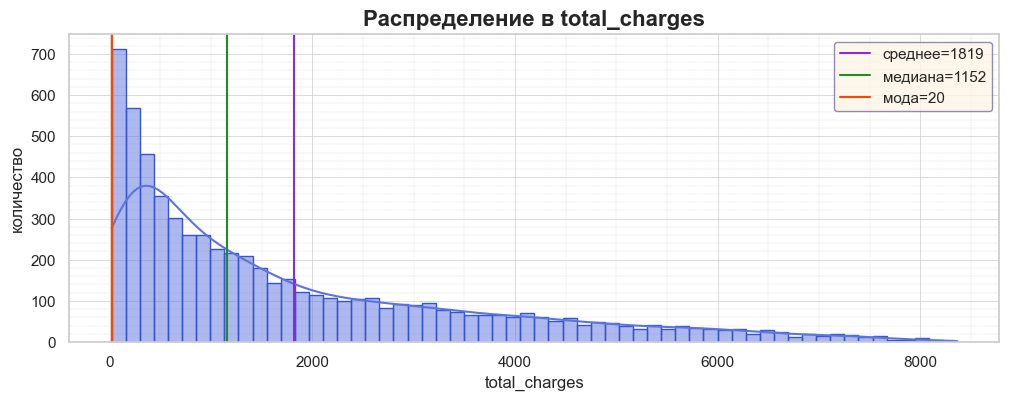

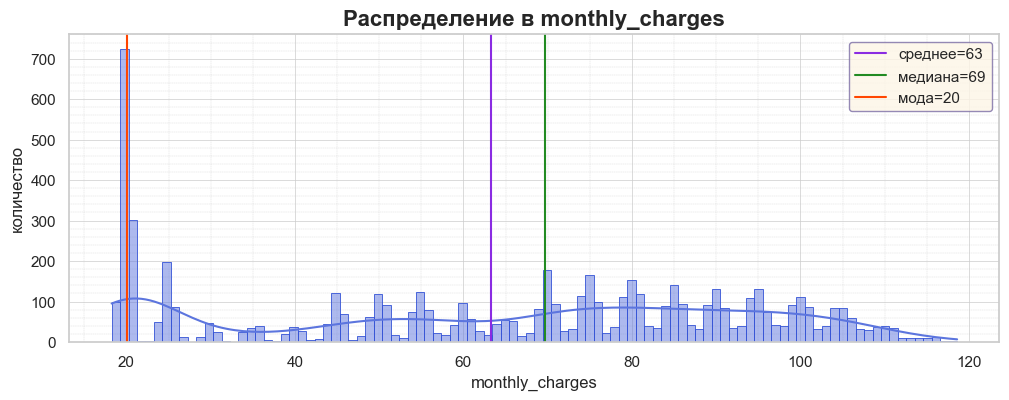

In [27]:
for i in [('total_charges', 60), ('monthly_charges', 100)]:
    get_hist(new_df[i[0]], bins=i[-1])

с увеличением количества бинов на гистограммах видно, что:
- распределение в *total_charges* скошено вправо, что вполне естественно для платежей и подоздений не вызывает
- а вот в распределении *monthly_charges* сильно выбивается "эконом"-сегмент - тех, кто платит меньше на порядок больше тех, кто платит больше, так как таких меньше)) эта информация может нам пригодиться, например, для создания дополнительного признака-когорты пользователей. Поделим их так:
  - до 20 - эконом
  - от 20 до 50 - средний
  - от 50 до 90 - ещё один средний
  - свыше 80 - випы

а ещё мы видим большой размах значений $\Rightarrow$ для борьбы с ним в числовых признаках для линейных алгоритмов будем использовать 
робастное масштабирование ```RobustScaler```, так как оно в своей формуле применяет медиану и интерквартильный размах: 

$$s_{ij}=\frac{x_{ij} - x_{j \: median}}{Q_3(x_j)-Q_1(x_j)}$$ 

за счёт чего делает масштабирование более устойчивым к возможным выбросам в данных

_____

сгенерируем теперь новых признаков на основе имеющихся, после чего отрисуем корреляционную матрицу и посмотрим, что получилось:

In [28]:
# разница в днях между begin_date и end_date
new_df['usage_days'] = (new_df['end_date'] - new_df['begin_date']).dt.days

# разница в неделях между begin_date и end_date
new_df['usage_weeks'] = ((new_df['end_date'] - new_df['begin_date']).dt.days // 7).astype(int)

# разница в месяцах между begin_date и end_date
new_df['usage_months'] = ((new_df['end_date'] - new_df['begin_date']).dt.days / 30).astype(int)

# количество активных услуг - методом .eq() сложим все 'yes'
new_df['active_services'] = new_df[['multiple_lines', 'online_security', 'online_backup', \
                                    'device_protection', 'tech_support', 'streaming_tv', \
                                    'streaming_movies']].apply(lambda x: x.eq('yes').sum(), axis=1)

# флаг наличия дополнительных услуг
new_df['additional_services_indicator'] = new_df[['online_security', 'online_backup', \
                                                  'device_protection', 'tech_support', \
                                                  'streaming_tv', 'streaming_movies']] \
                                          .apply(lambda x: 'yes' if 'yes' in x.values else 'no', axis=1)

# всякие сочетания соц.групп типа пожилой одинокий человек с иждивенцами на шее
new_df['senior_partner'] = ((new_df['senior_citizen'] == 1) & (new_df['partner'] == 'yes')).astype(int)
new_df['partner_dependents'] = ((new_df['dependents'] == 'yes') & (new_df['partner'] == 'yes')).astype(int)
new_df['senior_male'] = ((new_df['senior_citizen'] == 1) & (new_df['gender'] == 'male')).astype(int)
new_df['senior_female'] = ((new_df['senior_citizen'] == 1) & (new_df['gender'] == 'female')).astype(int)

# для создания когорт по ежемесячным платежам
def categorize_monthly_charges(x):
    if x < 20:
        return 4
    elif x >= 20 and x < 50:
        return 3
    elif x >= 50 and x < 90:
        return 2
    else:
        return 1
new_df['payment_category'] = new_df['monthly_charges'].apply(categorize_monthly_charges)

_____

#### Предварительный вывод. На данном этапе мы:

- с технической стороны обработали и подготовили данные для дальнейших манипуляций с ними:
  - исправили тип данных там, где он не соответствовал содержанию
  - заполнили пропуски в тех местах, где они возникли
  - убрали "хвост" в данных в самом начале сбора информации в 2014-м году, посчитав его за аномалию
  - сгенерировали ряд новых признаков на основе имеющихся
 
$\Rightarrow$ данные готовы к дальшейшей работе, пропусков нет и типы корректны, можно переходить к их изучению

_____

## Исследовательский анализ данных

изучим теперь попарную корреляцию всех имеющихся признаков на тепловой карте. Корреляцию всех признаков, в том числе и категориальных, мы получили при помощи библиотеки **Phik** - это библиотека подходит для анализа корреляций и взаимодействий в данных, с её помощью можно проводить анализ корреляций между категориальными и числовыми переменными и оценивать взаимодействия между ними:

interval columns not set, guessing: ['label', 'monthly_charges', 'total_charges', 'usage_days', 'usage_weeks', 'usage_months', 'active_services', 'senior_partner', 'partner_dependents', 'senior_male', 'senior_female', 'payment_category']


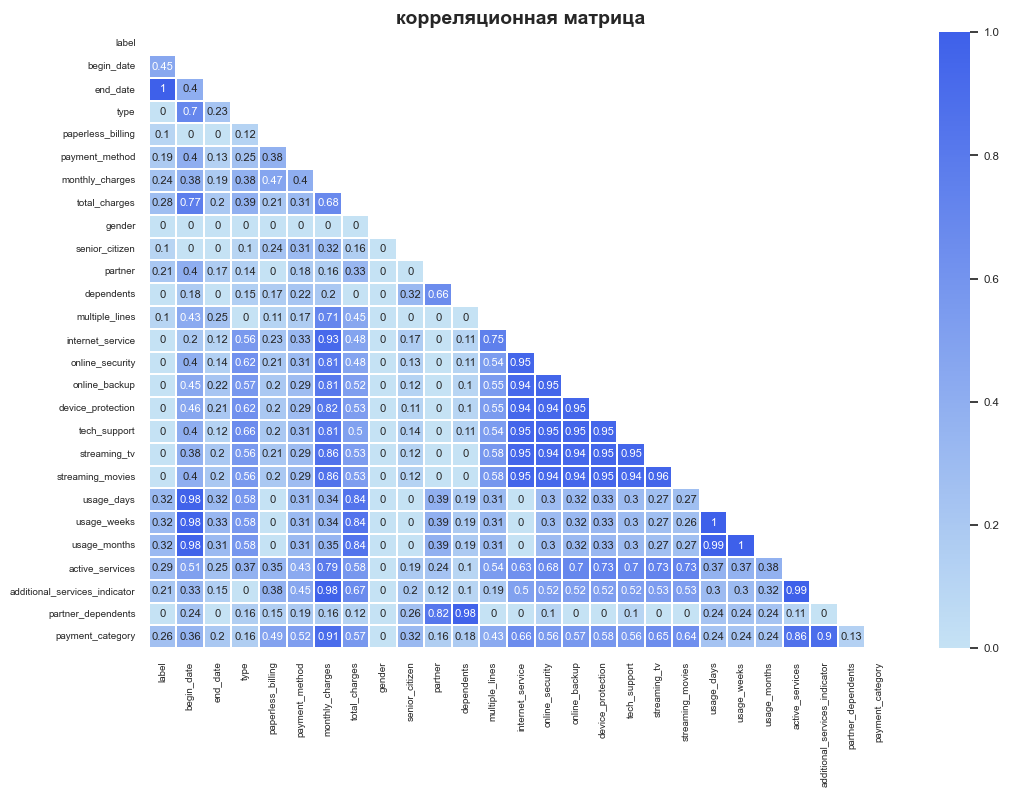

In [29]:
new_df = new_df[['label'] + [col for col in new_df.columns if col != 'label']].drop('index', axis=1)
corr_matrix = new_df.drop(columns='customer_id').phik_matrix()
get_corr_matrix(corr_matrix, correlation_threshold=0.1)

что мы видим на графике:
- как и предполагалось ранее, признаки, которые отвечают за доп.сервисы, сильно скоррелированы друг с другом и при этом практически никак не коррелируют с таргетом. Сильная корреляция может говорить о мультиколлинеарности между ними. Мультиколлинеарность у такого большой группы признаков разом - не очень хорошая идея дл ML-модели, так как она может повлиять на неё, затруднить интерпретацию и уменьшить предсказательную способность. А ещё при мультиколлинеарности коэффициенты регрессии могут стать нестабильными и менять свое направление при самых небольших изменениях данных. Так что это со всех сторон плохо $\Rightarrow$ хоть они и коррелируют с ежемесячными тратами, а ежемесячные траты, в свою очередь, влияют на таргет, бóльшую часть этих признаков после анализа мы удалим. Мы на их базе уже сформировалии некоторые новые признаки, которые пощадим
- признаки оплаты важны и полезны, что очень логично, а создание когорт в *payment_category* на базе ежемесячных платежей *monthly_charges* сформировало довольно приличный признак. Категоризацию в *payment_category* мы сделали нумерной осознанно и добровольно, она должна немного добавлять веса дорогим вип-клиентам, так как их меньше 
- признаки пола, пенсионного возраста и иждивенцев выглядят бесполезно для таргета, признаки, сгенерированные на основе их сочетаний, ситуацию тоже особо не поправили
- из новых календарных признаков количество дней и неделей коррелируют друг с другом на 100%. Удалим недели 
- дата начала пользования услугами хорошо коррелирует с таргетом, но она же связана с датой окончания пользования услугами, из которой, в свою очередь выведен таргет. Это говорит о том, что для машинного обучения календарные поля стоит удалить из данных, иначе они вызовут утечку целевой переменной, и потом "подглядывание" в таргет обманет нас
- некоторые новые сгенерированные признаки довольно неплохо коррелируют с таргетом, это:
  - ```usage_days``` - количество дней от даты подключения до даты "отключения" пользователя
  - ```usage_weeks``` - количество недель
  - ```active_services``` - количество активных подключённых услуг
  - ```average_monthly_charges``` - средний расход на услуги в месяц
  - ```additional_services_indicator``` - флаг наличия дополнительных услуг (учёт без multiple_lines)
  - ```payment_category``` - клиентские категории по платежам
- но есть и такие, которые не показали толкового результата - это различные комбинации:
  - ```senior_partner``` - пожилой неодинокий человек
  - ```partner_dependents``` - в браке/отношениях и с иждивенцами
  -  ```senior_male``` - пожилой мужчина
  -  ```senior_female``` - пожилая женщина

то есть, мало того, что признаки типа пол/иждивенцы/супруги по отдельности не показывают корреляции, так они и в сочетаниях друг с другом показывают корреляцию только между собой $\Rightarrow$ посчитаем эти признаки за шумные и в дальнейшем некоторые из них удалим, а также удалим признаки с датой, они нам больше не пригодятся

_____

теперь, когда мы определились с признаками и посмотрели их взаимосвязь с целевой переменной, самое время рассмотреть нашу задачу и со стороны пользователей - отрисуем графики распределения, в которых в каждой отдельной фигуре для каждого признака будет:
- график распределения для клиентов, пользующихся услугами оператора связи «Ниединогоразрыва.ком»
- график распределения для клиентов, которые разорвали всякие связи с оператором связи:

дополнительно для исследуемых признаков сравним гипотезы их влияния на целевую переменную, т.е. на отток, с уровнем значимости $\alpha=5\%$. Сформулируем гипотезы:
- $H_0$ - признак не имеет влияния не целевую переменную
- $H_1$ - признак имеет влияние не целевую переменную

для категориальных признаков будем применять $\chi^2$ (хи квадрат), он основан на сравнении фактического наблюдаемого распределения с ожидаемым распределением, которое должно быть случайным, если нулевая гипотеза верна

а для числовых признаков применим t-тест для независимых выборок, так как каждому клиенту в данных соответствует только одна метка - 0 или 1. *t-тест* основан на сравнении различия между средними значениями выборок с ожидаемым различием в случае, если нулевая гипотеза верна

датасет разбит на два:
датасет churned_customers
	размер = (888, 31)
	пропусков в данных: 0
датасет active_customers
	размер = (5471, 31)
	пропусков в данных: 0


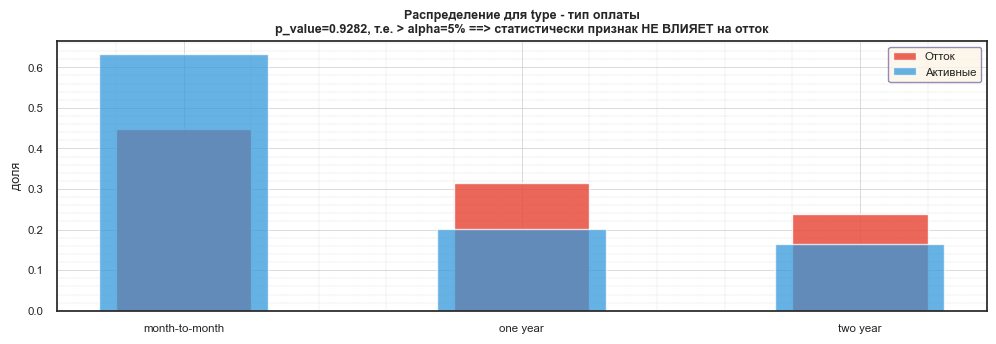

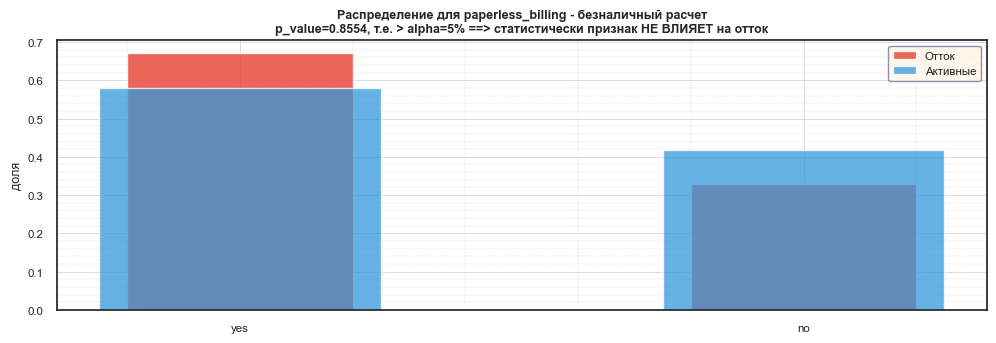

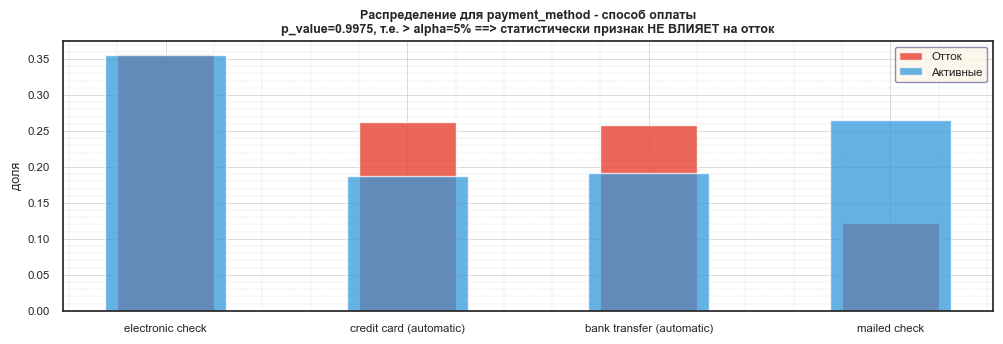

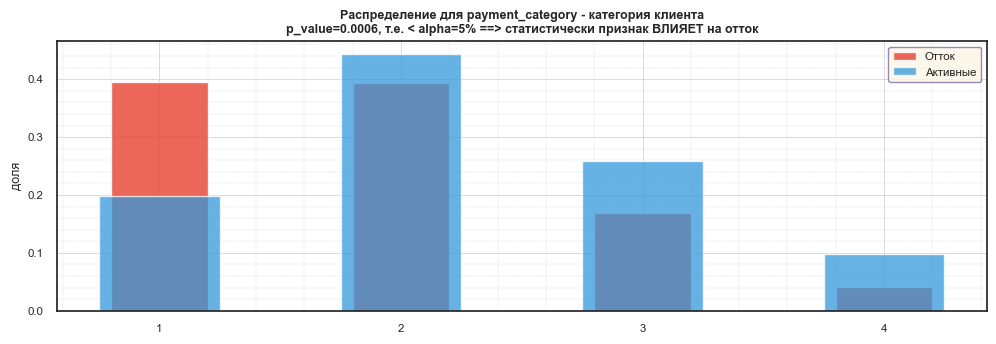

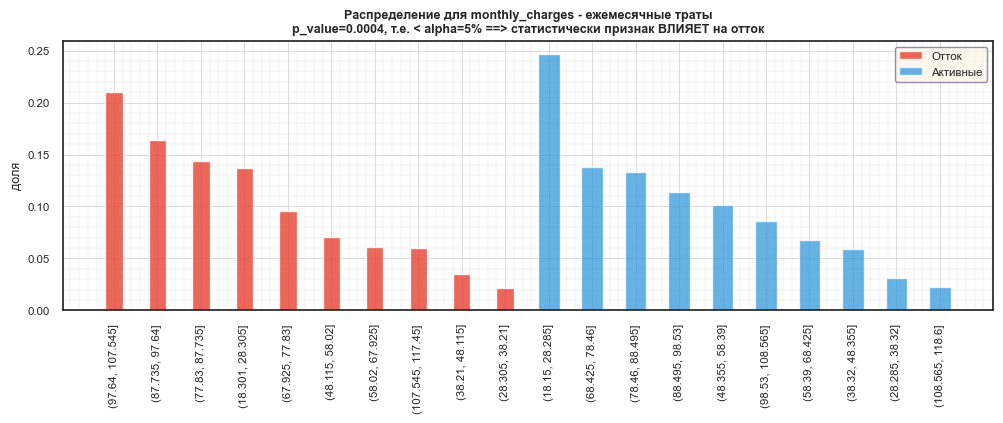

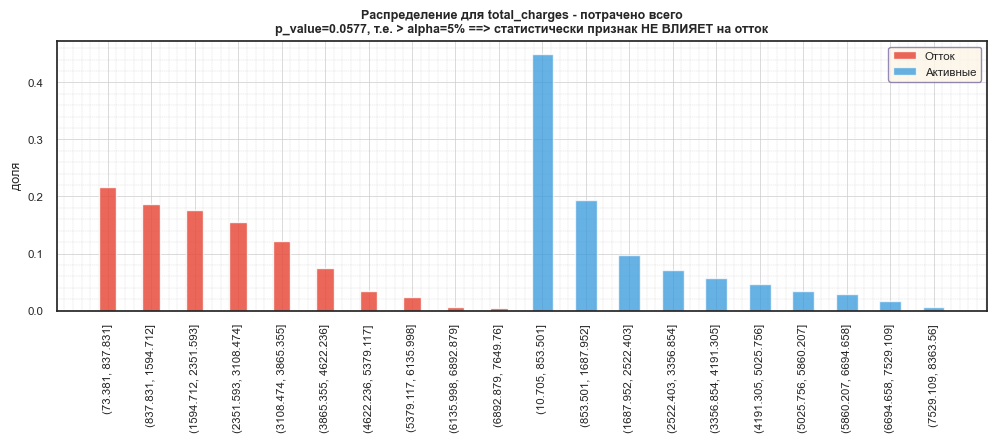

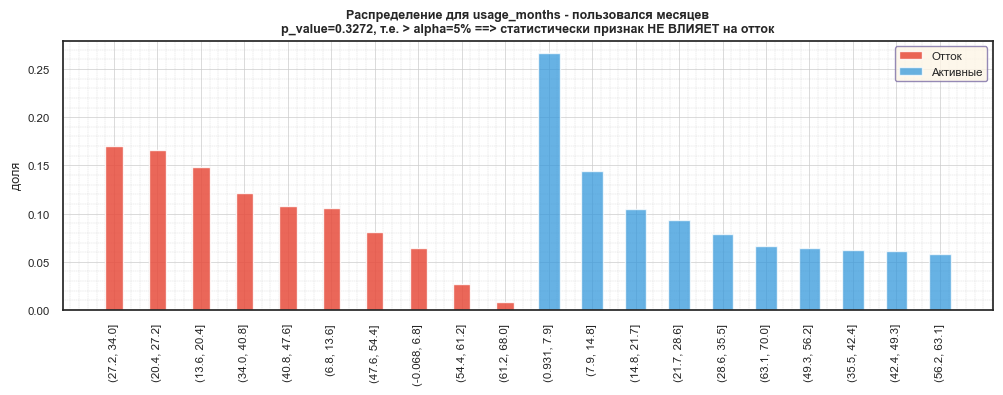

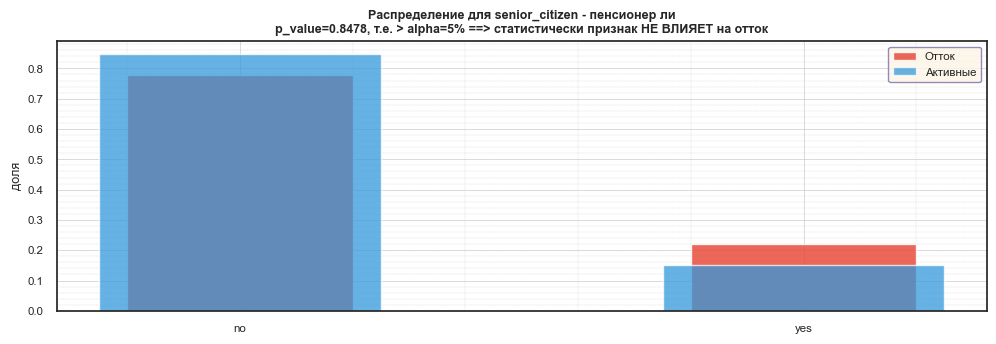

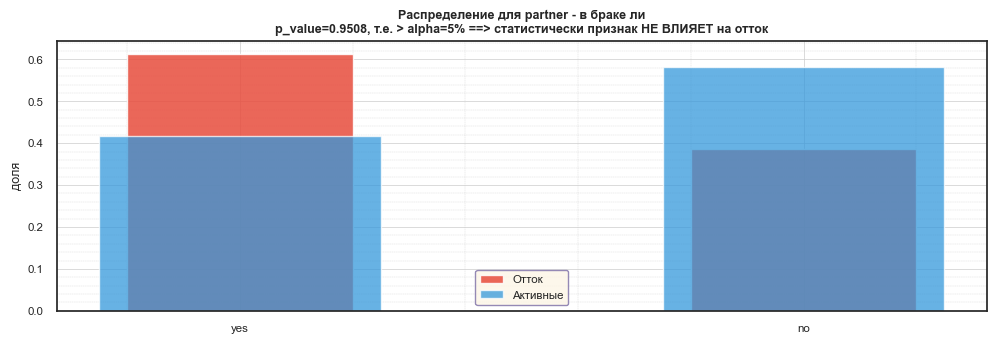

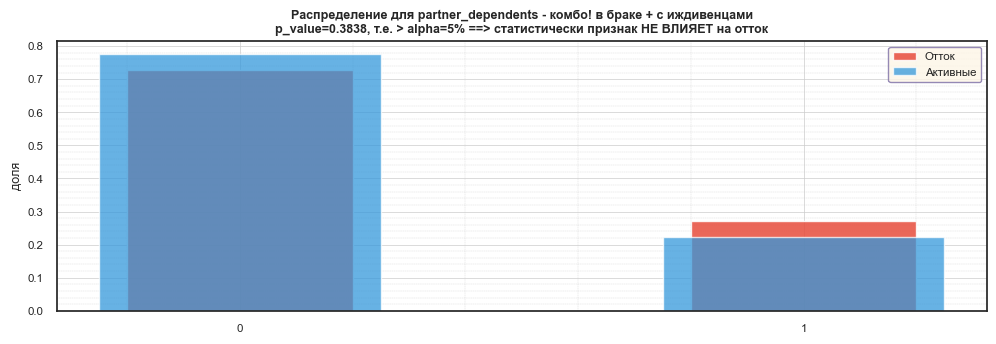

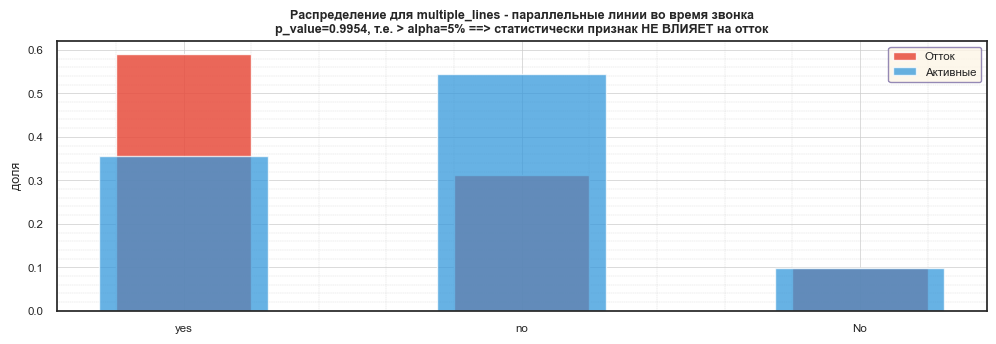

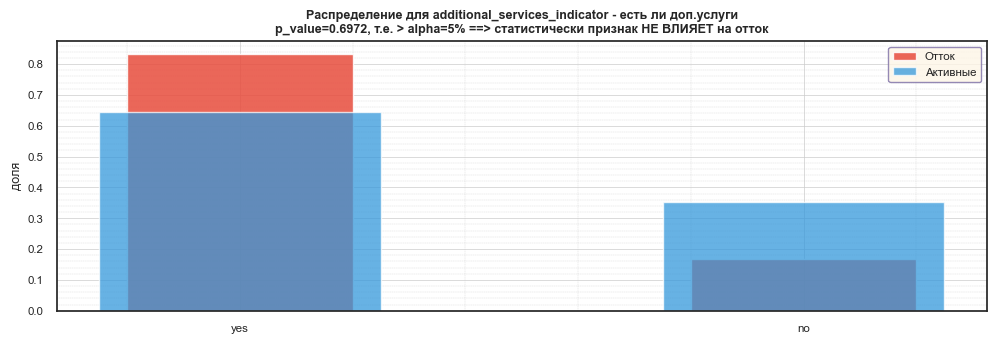

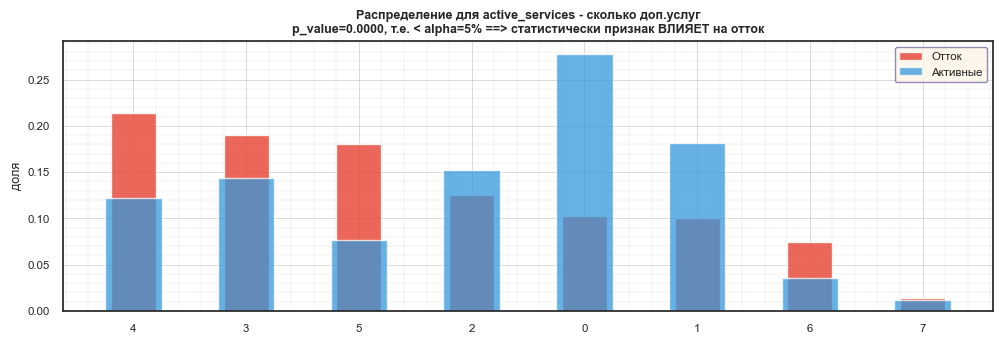

In [30]:
features_dict = {
    'type': 'тип оплаты',
    'paperless_billing': 'безналичный расчет',
    'payment_method': 'способ оплаты',
    'payment_category': 'категория клиента',
    'monthly_charges': 'ежемесячные траты',
    'total_charges': 'потрачено всего',
    'usage_months': 'пользовался месяцев',
    'senior_citizen': 'пенсионер ли',
    'partner': 'в браке ли',
    'partner_dependents': 'комбо! в браке + с иждивенцами',
    'multiple_lines': 'параллельные линии во время звонка',
    'additional_services_indicator': 'есть ли доп.услуги',
    'active_services': 'сколько доп.услуг'
}
comparison_of_distribution_across_datasets(new_df, list(features_dict.keys()), list(features_dict.values()))

вот к каким выводам подталкивают графики:
- к оттоку менее склонны пользователи с долгосрочными контрактами
- способы оплаты прямо подчёркивают нам то, что в этом направлении наблюдаются какие-то проблемы, так как старые добрые почтовые переводы и наличный расчёт за услуги Оператора удерживают пользователей, а вот оплачивающие услуги безналом, кредитными картами и автопереводами склонны к оттоку. Причин тому может быть множество: неудобная форма оплаты на сайте, отсутствие уведомлений о списании и пр. - эту ситуацию обязательно нужно подсветить
- с категорией клиента мы попали в яблочко и обнаружили то, что пользователи, платящие за услуги Оператора свыше 90 денежных единиц в месяц, сбегают не оглядывалясь. Это довольно удручающая информация, так как при всей своей немногочисленности подобные пользователи часто приносят самый ощутимый доход. Интересно и то, что клиенты, платящие ниже 90 денег в месяц, уже не склонны к оттоку. Это говорит о том, что на верхнем "вип"-уровне услуг Оператор «Ниединогоразрыва.ком» явно промахивается и не учитывает эластичность спроса (вот статья о ней из [Википедии](https://ru.wikipedia.org/wiki/%D0%AD%D0%BB%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C_%D1%81%D0%BF%D1%80%D0%BE%D1%81%D0%B0)), которая может формироваться по большому множеству факторов, к примеру:
  - большого количества товаров-конкурентов или товаров-заменителей на рынке
  - резкого и заметного для покупателя изменения уровня цен
  - широкой осведомлённости покупателей о рынке интересующих их товаров (у конкурентов реклама есть, а у «Ниединогоразрыва.ком» нет)
  - достаточное количество времени на выбор товара
  - высокий удельный вес товара в расходах потребителя
- похожая картинка оттока и у тех, кто платит много ежемесячно. Диапазон оплат в 97-107 денег в месяц приводит к наибольшему оттоку
- а вот чем больше пользователь отдал за всё время сотрудничества, тем меньше он склонен уходить, и наоборот. Из этого наблюдения мы может сделать предположение о том, что спустя длительное время пользования услугами оператора лояльность к нему растёт, пользователи привыкают к сервисам и не склонны уходить, а значит Компании стоит уделять внимание маркетинговой активности в направлении удержания "новичков", которые пока не так надёжны
- группа социальных признаков в разных комбинациях показывает некий общий портрет пользователя:
  - пользователи в браке склонны к оттоку, чего-то им не хватает
  - пенсионеров среди клиентов не так много и они оттекают, страшно подумать, куда
  - пользователей в браке и без иждивенцев больше, чем в браке с иждивенцами. Иждивенцы как-то влияют на отток, возможно дело просто в ограниченном финансовом положении, весь бюджет съели иждивенцы))
  - в целом мы будем помнить о том, чо для нашей задачи машинного обучения эти признаки довольно бесполезны, а информация, выявленная в результате их анализа, скорее будет интересная маркетинговому отделу Ниединогоразрыва
- а вот с доп.услугами картинка для нас интереснеее:
  - у большинства пользвателей подключены какие-то доп.услуги и это же большинство склонно к оттоку. При этом по отдельности та или иная доп.услуга на отток не влияет, но вместе они создают определённую картину
  - 1-2 дополнительные услуги никак не отражаются на лояльности пользователей
  - но начинас с 3-х и далее услуг пользователи склоняются к оттоку, а значит Компании стоит болше внимания уделять пакетным предложениям услуг, делать их более кастомизированными и не перегибать с "навязыванием"
- multiple_lines - возможность поддерживать несколько номеров на одном телефонном аппарате и совершения с них звонков в одно время. Наличие данной опции склоняет пользователей к оттоку и компании стоит пересмотреть подход к ней. К сожалению, у нас недостаточно детальной информации, для того, чтобы верно интерпретировать эту услугу. Вариантов два:
  - речь идёт о многоканальном домашнем телефоне, тогда можнно смело заявлять о потере актуальности в данном предложении, XXI век на дворе
  - речь идёт о бизнес-предложении, предполагающем два номера на мобильный телефон с какими-то под условиями. К примеру, это могут быть личный номер и номер для бизнеса. Тогда предложение должно быть интересно узкой аудитории бизнес-пользователей, которым важно оставаться на связи и отделять ~мух от котлет~ личные звонки от рабочих. Если multiple_lines об этом, то стоит проверить цены на услугу и промониторить аналогичные предложения от конкурентов, кто-то явно предлагает услугу multiple_lines по более выгодным условиям
- согласно стат.методам на отток влияют только категория клиента, ежемесячные траты и количество подключенных доп.услуг, остальные признаки с вероятностью в 95% не имеют влияния на отток

_____

Данные исследовали, некоторые закономерности обнаружили и нам теперь, помимо ML-модели, будет что презентовать заказчику. А для модели часть рассматриваемых признаков лишняя, так как не коррелирует с таргетом $\Rightarrow$ удалим лишнее, оставим нужное, посмотрим ещё раз на корреляционном матрице те признаки, с которыми будем иметь дело, и перейдём уже к моделированию:

,label,customer_id,paperless_billing,payment_method,monthly_charges,senior_citizen,partner,usage_days,active_services,payment_category
5614,0,0042-jvwoj,yes,bank transfer (automatic),19.60,no,no,792,0,4
118,0,8587-xyzsf,no,bank transfer (automatic),50.55,no,no,2041,1,2
3631,0,1686-stuhn,no,bank transfer (automatic),19.80,no,no,1279,0,4


interval columns not set, guessing: ['label', 'monthly_charges', 'usage_days', 'active_services', 'payment_category']


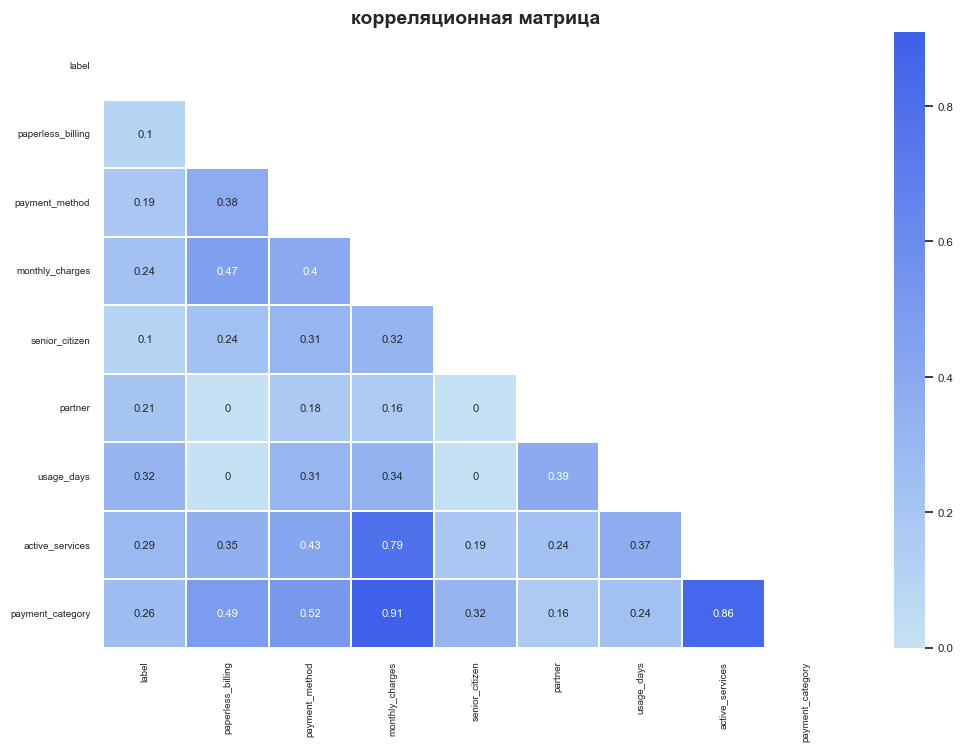

In [31]:
resers_df = new_df.copy()
new_df = resers_df.copy()
new_df = new_df.drop(columns=['begin_date', 'end_date', 'usage_weeks', 'gender', 'total_charges', 'type', \
                              'additional_services_indicator', 'senior_female', 'senior_male', \
                              'senior_partner', 'partner_dependents', \
                             'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_movies', \
                             'usage_months', 'streaming_tv', 'dependents', 'multiple_lines', 'internet_service'])


display(new_df.sample(3, random_state=RANDOM_STATE))
corr_matrix = new_df.drop(columns='customer_id').phik_matrix()
get_corr_matrix(corr_matrix, correlation_threshold=0.1)

_____

#### Предварительный вывод. На данном этапе мы:

- на основе доступной нам информации провели анализ данных:
    - с точки зрения бизнес-аналитики
    - с точки зрения полезности для Machine Learning
- выявили некоторые особенности, которые указывают на вероятные причины роста оттока пользователей. Эта информация может пригодиться маркетинговому отделу Оператора связи «Ниединогоразрыва.ком», мы обобщим её для них после разработки ML-модели
- из данных оставили для себя те признаки, которые как-то коррелируют с целевой переменной и должны помочь в дальнейшем обучении модели. Частично это те признаки, что были предоставлены нам изначально, частично - новые, сгенерированные на базе старых

$\Rightarrow$ проделанный анализ позволил нам глубже погрузиться в тему и должен помочь в дальнейшей работе

_____

## Подготовка ML-модели

перед разделением данных на тренировочную и тестовую выборки посмотрим на то, в каком соотношении представлен таргет: 

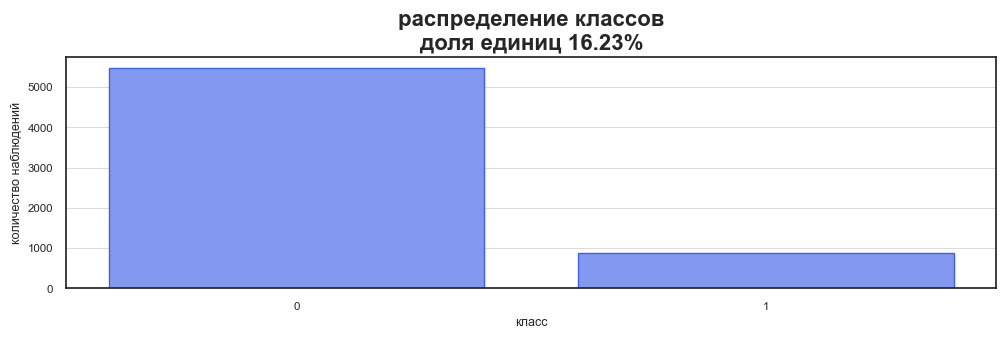

In [32]:
class_distribution_plot(new_df['label'])

перед нами дисбаланс классов, а значит разделение на тренировочную и тестовую выборку мы будем производить с применением стратификации по тагрету, это позволит нам сохранить баланс классов в каждой выборке. Конечно, для ROC_AUC это не имеет никакого значения, но и лишним не будет наверняка. Порежем данные и сразу посмотрим на получившиеся размеры:

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    new_df.drop(columns=['customer_id', 'label']), new_df['label'], test_size=.25, 
    random_state=RANDOM_STATE, stratify=new_df['label'])

print(f'размеры:\n{X_train.shape=}   {y_train.shape=}\n{X_test.shape=}   {y_test.shape=}\n'
      f'доля X_test = {X_test.shape[0]/new_df.shape[0]:.2%}')

размеры:
X_train.shape=(4769, 8)   y_train.shape=(4769,)
X_test.shape=(1590, 8)   y_test.shape=(1590,)
доля X_test = 25.00%


_____

Переберём несколько ML-алгоритмов с параметрами, подобранными при помощи *RandomizedSearchCV*, посчитаем на тренировочных данных с применением кросс-валидации метрики *ROC_AUC* и *Accuracy* и соберём результаты и обученные модели в единую структуру-список *pipeline_and_predicts_list*, после из него потом будет выбирать "победителя", обращаясь к обученной модели по идексу. А для всех манипуляций с обучением и сбором данных у нас есть самописный класс *ModelAnalyzer*, к его экземпляру и будем обращаться:

In [34]:
# список:
pipeline_and_predicts_list = list()

# для удобства:
del_str_train = 'ROC_AUC на train при cross validation'
del_str_test = 'ROC_AUC на test'

# вот экземпляр класса ModelAnalyzer:
analyzer = ModelAnalyzer()

# списки колонок
analyzer.categorical_cols = new_df.drop(columns='customer_id') \
    .select_dtypes(include=['object']).columns.tolist()

analyzer.other_cols = new_df.drop(columns=['customer_id', 'label']) \
    .select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()

print(f'categorical_cols = {analyzer.categorical_cols}\nother_cols = {analyzer.other_cols}')

categorical_cols = ['paperless_billing', 'payment_method', 'senior_citizen', 'partner']
other_cols = ['monthly_charges', 'usage_days', 'active_services', 'payment_category']


_____

#### LogisticRegression

для разгона первым алгоитмом рассмотрим лог.регрессию с применением стандартизации к числовым признакам и в сетке параметров переберём такие:
- ```C``` - регуляризация
- ```tol``` - критерий останова
- ```intercept_scaling``` - вес интерсепта $w_0$
- ```class_weight``` - учёт дисбаланса классов, ручной, стандартный и без учёта

дополнительно поможем лог.регрессии найти нелинейные связи, добавив параметр *degree* в *PolynomialFeatures* = 2 и стандартизировав признаки:

------------------------------ 
подобранные параметры:
{'classifier__tol': 0.0001, 'classifier__intercept_scaling': 0.5, 'classifier__class_weight': {0: 1, 1: 6}, 'classifier__C': 0.1}
 ------------------------------


,модель,Accuracy,ROC_AUC на train при cross validation
0,"LogisticRegression(C=0.1, class_weight={0: 1, 1: 6}, intercept_scaling=0.5,\n max_iter=10000, random_state=280823)",0.71,0.78


CPU times: total: 1.5 s
Wall time: 4.88 s


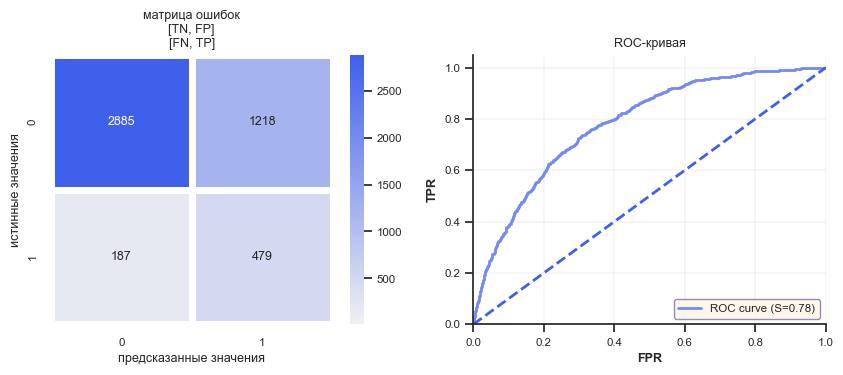

In [35]:
%%time
model = LogisticRegression(random_state=RANDOM_STATE, max_iter=10000)
params = {
    'classifier__C': [.1, 1, 10],
    'classifier__tol': [1e-4, 1e-5],
    'classifier__intercept_scaling': [.5, 1, 1.5],
    'classifier__class_weight': [{0:1, 1:6}, 'balanced', None],
}
pipeline, table_row, y_pred_train =\
    analyzer.choosing_best_model(model, X_train, y_train, param_grid=params, standardize=True, polynomial_degree=2, n_iter=54)

pipeline_and_predicts_list.append((type(model).__name__, pipeline, y_pred_train))
display(table_row.pivot_table.drop(columns=del_str_test).iloc[[-1]].round(2))

_____

#### StackingClassifier

вот ещё один вариант лог.регрессии - стэкинг, в котором одна из линейных моделей выступит в качестве метамодели. Гиперпараметры те же, только заменён ```tol``` ```solver``` (алгоритм оптимизации), так как *StackingClassifier* не работает с *tol*:

------------------------------ 
подобранные параметры:
{'classifier__model__solver': 'liblinear', 'classifier__model__penalty': 'l1', 'classifier__model__max_iter': 10000, 'classifier__model__C': 0.1, 'classifier__lr__penalty': 'l2', 'classifier__lr__C': 10}
 ------------------------------


,модель,Accuracy,ROC_AUC на train при cross validation
1,"StackingClassifier(estimators=[('model',\n LogisticRegression(C=0.1, max_iter=10000,\n penalty='l1',\n random_state=280823,\n solver='liblinear')),\n ('lr',\n LogisticRegression(C=10, random_state=280823))],\n final_estimator=LogisticRegression())",0.86,0.79


CPU times: total: 3.36 s
Wall time: 16.2 s


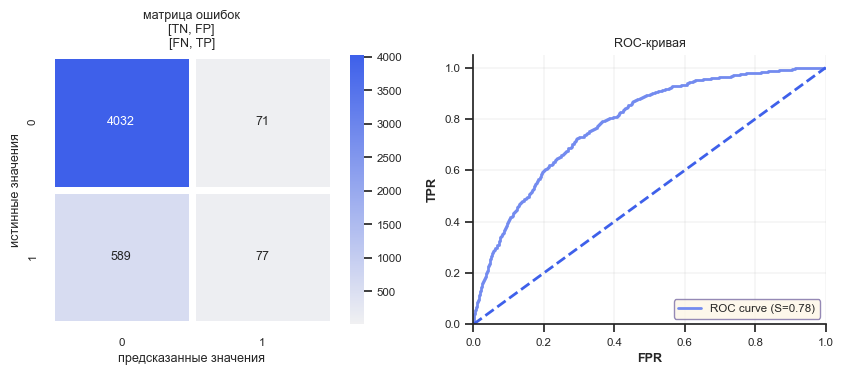

In [36]:
%%time
model = LogisticRegression(random_state=RANDOM_STATE, max_iter=10000)

params = {
    'classifier__model__penalty': ['l1', 'l2'],
    'classifier__model__C': [0.01, 0.1, 1, 10, 100],
    'classifier__model__solver': ['liblinear'],
    'classifier__model__max_iter': [10000],
    'classifier__lr__C': [0.01, 0.1, 1, 10, 100],
    'classifier__lr__penalty': ['l1', 'l2']
}
pipeline, table_row, y_pred_train =\
    analyzer.choosing_best_model(model, X_train, y_train, param_grid=params, standardize=True, polynomial_degree=2, n_iter=54, stack=True)

pipeline_and_predicts_list.append((type(model).__name__, pipeline, y_pred_train))
display(table_row.pivot_table.drop(columns=del_str_test).iloc[[-1]].round(2))

_____

#### CatBoostClassifier

опробуем детище Яндекса со следующими гиперпараметрами:
- ```bagging_temperature``` - температура бэггинга
- ```thread_count``` - количество потоков
- ```iterations``` - количество итераций
- ```learning_rate``` - скорость обучения
- ```depth``` - глубина деревьев
- ```l2_leaf_reg``` - регуляризация
- ```border_count``` - количество границ для численных признаков
- ```scale_pos_weight``` - вес класса 1

------------------------------ 
подобранные параметры:
{'classifier__thread_count': 3, 'classifier__scale_pos_weight': 1, 'classifier__learning_rate': 0.5, 'classifier__l2_leaf_reg': 10, 'classifier__iterations': 1266, 'classifier__depth': 2, 'classifier__border_count': 256, 'classifier__bagging_temperature': 5}
 ------------------------------


,модель,Accuracy,ROC_AUC на train при cross validation
2,<catboost.core.CatBoostClassifier object at 0x000001DDC31B0DF0>,0.96,0.9


CPU times: total: 15.2 s
Wall time: 10min 5s


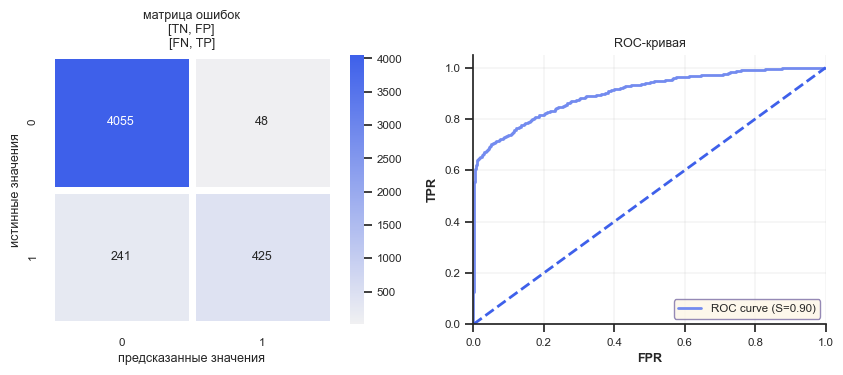

In [37]:
%%time
model = CatBoostClassifier(random_seed=RANDOM_STATE, verbose=False)
params = {
    'classifier__bagging_temperature': range(1, 9),
    'classifier__thread_count': range(1, 6),
    'classifier__iterations': range(501, 1501),
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.5],
    'classifier__depth': range(1, 13),
    'classifier__l2_leaf_reg': [0.1, 1, 3, 10, 20],
    'classifier__border_count': [32, 64, 128, 256],
    'classifier__scale_pos_weight': range(1, 11)
}
pipeline, table_row, y_pred_train =\
    analyzer.choosing_best_model(model, X_train, y_train, param_grid=params)

pipeline_and_predicts_list.append((type(model).__name__, pipeline, y_pred_train))
display(table_row.pivot_table.drop(columns=del_str_test).iloc[[-1]].round(2))

_____

#### RandomForestClassifier

Для случайного леса не будем делать нормализацию числовых признаков, она для него не принпиципальна. А параметры переберём такие:
- ```n_estimators``` - количество деревьев в лесу
- ```criterion``` - формула измерения качества разбиения в каждом узле
- ```max_depth``` - максимальная глубина каждого дерева в лесу
- ```min_samples_split``` - минимальное количество объектов, необходимых для разбиения узла
- ```min_samples_leaf``` - минимальное количество объектов в листе
- ```max_features``` - количество признаков для поиска лучшего разбиения
- ```bootstrap``` - использование бутстрэпа для построения деревьев

------------------------------ 
подобранные параметры:
{'classifier__n_estimators': 665, 'classifier__min_samples_split': 24, 'classifier__min_samples_leaf': 1, 'classifier__max_features': None, 'classifier__max_depth': None, 'classifier__criterion': 'gini', 'classifier__bootstrap': True}
 ------------------------------


,модель,Accuracy,ROC_AUC на train при cross validation
3,"RandomForestClassifier(max_features=None, min_samples_split=24,\n n_estimators=665, random_state=280823)",0.9,0.82


CPU times: total: 37.3 s
Wall time: 5min 43s


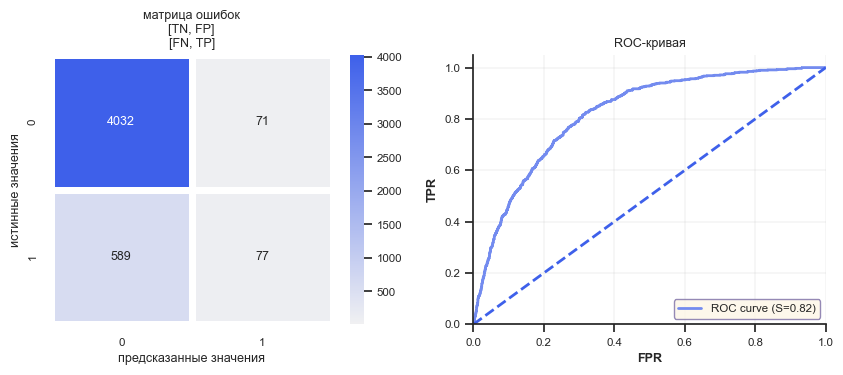

In [38]:
%%time
model = RandomForestClassifier(random_state=RANDOM_STATE)
params = {
    'classifier__n_estimators': range(151, 801),
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': range(2, 31),
    'classifier__min_samples_leaf': range(1, 5),
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}
pipeline, table_row, y_pred_train =\
    analyzer.choosing_best_model(model, X_train, y_train, param_grid=params)

pipeline_and_predicts_list.append((type(model).__name__, pipeline, y_pred_train))
display(table_row.pivot_table.drop(columns=del_str_test).iloc[[-1]].round(2))

_____

#### KNeighbors

и для K ближайших соседей рассмотрим такие гиперпараметры:
- ```n_neighbors``` - количество соседей для классификации
- ```weights``` - веса соседей (uniform или distance)
- ```algorithm``` - алгоритм поиска ближайших соседей

и дополнительно сгенерируем ему полиномиальных признаков, они самую малость исправляют переобучение:

------------------------------ 
подобранные параметры:
{'classifier__weights': 'distance', 'classifier__n_neighbors': 20, 'classifier__algorithm': 'ball_tree'}
 ------------------------------


,модель,Accuracy,ROC_AUC на train при cross validation
4,"KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20, weights='distance')",1.0,0.78


CPU times: total: 8.7 s
Wall time: 51.1 s


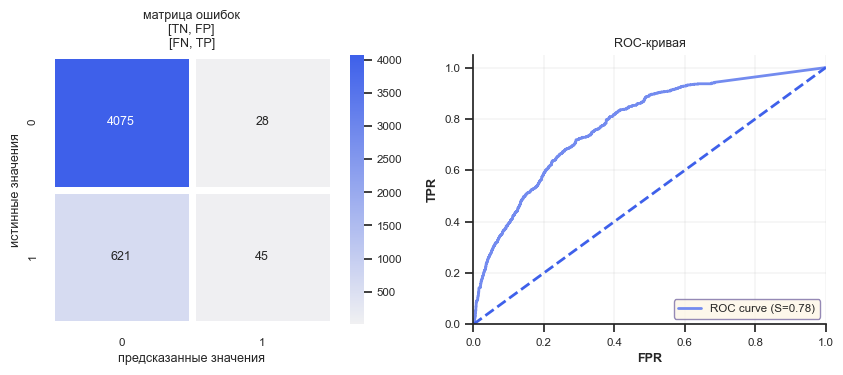

In [39]:
%%time
model = KNeighborsClassifier()
params = {
    'classifier__n_neighbors': range(1, 21),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
pipeline, table_row, y_pred_train =\
    analyzer.choosing_best_model(model, X_train, y_train, param_grid=params, polynomial_degree=4, n_iter=160)

pipeline_and_predicts_list.append((type(model).__name__, pipeline, y_pred_train))
display(table_row.pivot_table.drop(columns=del_str_test).iloc[[-1]].round(2))

_____

смотрим на готовый результат:

,модель,Accuracy,ROC_AUC на train при cross validation
2,<catboost.core.CatBoostClassifier object at 0x000001DDC31B0DF0>,0.960788,0.903652
3,"RandomForestClassifier(max_features=None, min_samples_split=24,\n n_estimators=665, random_state=280823)",0.903963,0.820862
1,"StackingClassifier(estimators=[('model',\n LogisticRegression(C=0.1, max_iter=10000,\n penalty='l1',\n random_state=280823,\n solver='liblinear')),\n ('lr',\n LogisticRegression(C=10, random_state=280823))],\n final_estimator=LogisticRegression())",0.862445,0.785006
0,"LogisticRegression(C=0.1, class_weight={0: 1, 1: 6}, intercept_scaling=0.5,\n max_iter=10000, random_state=280823)",0.711889,0.782095
4,"KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20, weights='distance')",1.000000,0.779144


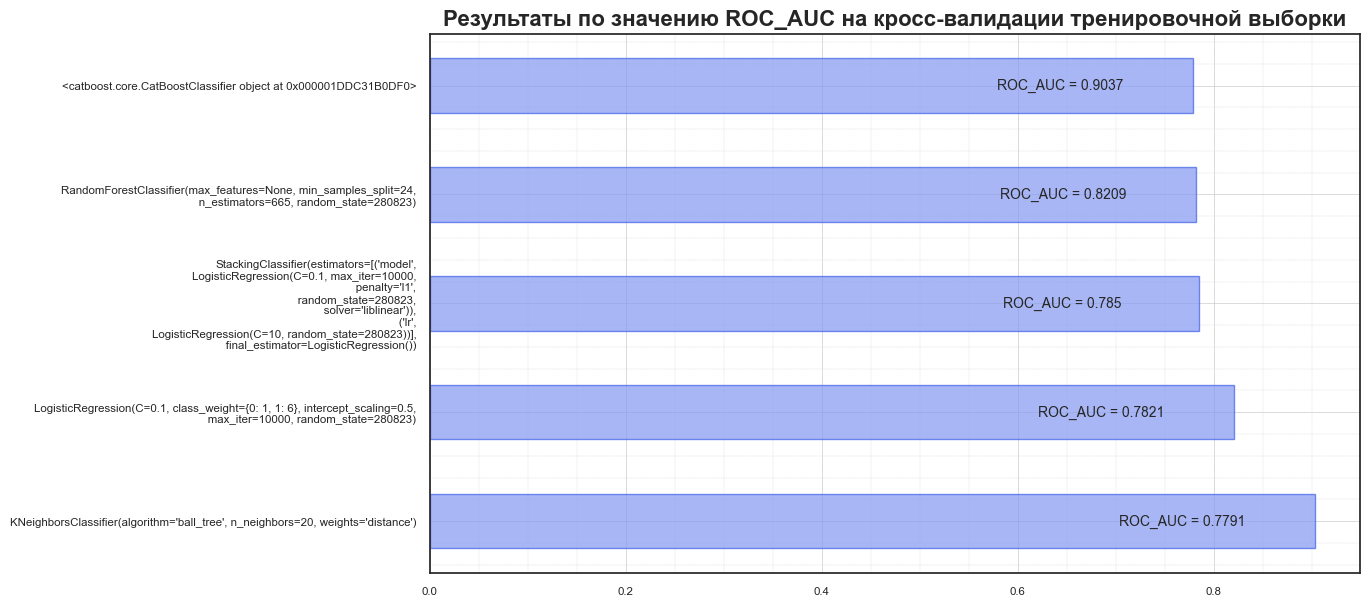

In [40]:
result_table = GetFinalTable.pivot_table.drop(columns='ROC_AUC на test') \
    .sort_values('ROC_AUC на train при cross validation', ascending=False)
display(result_table)
plot_barh(result_table)

что мы видим:
- в лидерах оказался ```CatBoost``` со значением *ROC_AUC* > 0.9
- стэкинг лог.регрессии сильно не помог, результаты *ROC_AUC* получились лучшие всего на несколько сотых
- KNN здорово переобучился, вернув 100% точное предсказание на тренировочной выборке и провалившись на тестовой

$\Rightarrow$ лидера в гонке по значению *ROC_AUC* мы определили, им оказался **CatBoostClassifier**, который в нашем списке сохранён под индексом №2. Посмотрим на него и проверим качество выбранной модели на тестовой выборке::

In [41]:
pipeline_and_predicts_list[2]

('CatBoostClassifier',
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('cat',
                                                   OneHotEncoder(drop='first',
                                                                 handle_unknown='ignore'),
                                                   ['paperless_billing',
                                                    'payment_method',
                                                    'senior_citizen',
                                                    'partner']),
                                                  ('num', 'passthrough',
                                                   ['monthly_charges',
                                                    'usage_days',
                                                    'active_services',
                                                    'payment_category'])])),
                 ('poly', PolynomialFeatures(degree=1)),
                 ('cla

,модель,Accuracy,ROC_AUC на test
5,<catboost.core.CatBoostClassifier object at 0x000001DDC31B0DF0>,0.95,0.921066


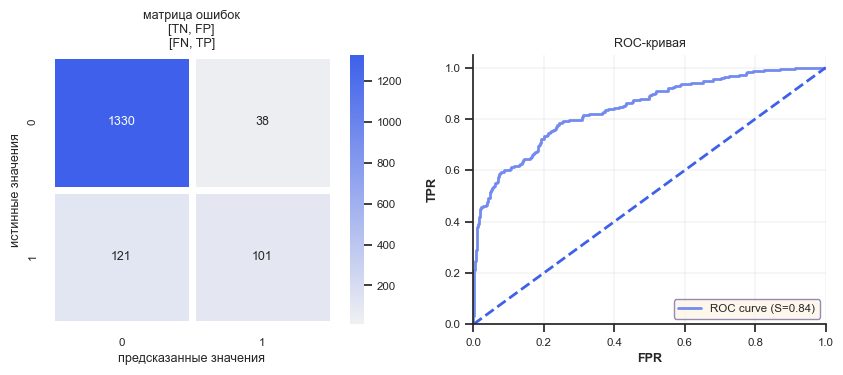

In [42]:
table_row, y_pred_test =\
    analyzer.choosing_best_model(pipeline_and_predicts_list[2][1], X_train, y_train, param_grid=params, X_test=X_test, y_test=y_test)

pipeline_and_predicts_list.append((type(model).__name__, pipeline, y_pred_train))
display(table_row.pivot_table.drop(columns=del_str_train).iloc[[-1]].round(2))

наша модель показала хороший результат на отложенной выборке:
- ```ROC_AUC = 0.92``` - ROC_AUC как качество модели по всем возможным порогам вероятности говорит о том, что модель имеет высокую способность разделять пользователей на отток и не-отток
- ```площадь под ROC-кривой ROC_curve = 0.84```
- ```Accuracy = 0.95``` - общая точность модели до 95%
- ```TN = 1330```
- ```FP = 38``` - модель совершила 38 ошибок первого рода, перестраховалась и предсказала отток там, где его нет
- ```FN = 101``` - модель совершила 101 ошибку второго рода и не заметила 101 отток
- ```TP = 157```

сохраним обученный пайплайн для будухих работ:

In [43]:
folder_name = 'pipelines'
try:
    os.mkdir(folder_name)
except FileExistsError:
    pass

joblib.dump(pipeline_and_predicts_list[2][1], os.path.join(folder_name, f'pipeline_CatBoost'))

['pipelines\\pipeline_CatBoost']

В целом, хоть результаты мы видим и хорошое, для их правильной интепретации не помешали бы бизнес-показатели и метрики, к примеру, стоимость промокода или стоимость потери клиента. Так мы смогли бы более уревенно интерпретировать не только результаты работы модели, но и настроить её ещё на этапе обучения под соответствующий порог вероятности классификации. Но, к сржалению, пока у нас таких данных нет, так что будет считать, что наша модель справилась с полставленной задачей очень хорошо и количество ошибок второго рода с финансовой точки зрения допустимо. Определённо, мы перешагнули допустимый порог в ROC_AUC >= 0.85, и показали общую точность аж в 0.95, так что такая модель нам подходит.

А для полной уверенности в том, что модель не играла в угадайку, сравним результат её работы с результатом работы константной dummy-модели, предсказывающей наиболее часто встречаемый класс в обучающем наборе данных. Результат сравнения отрисуем на графике:

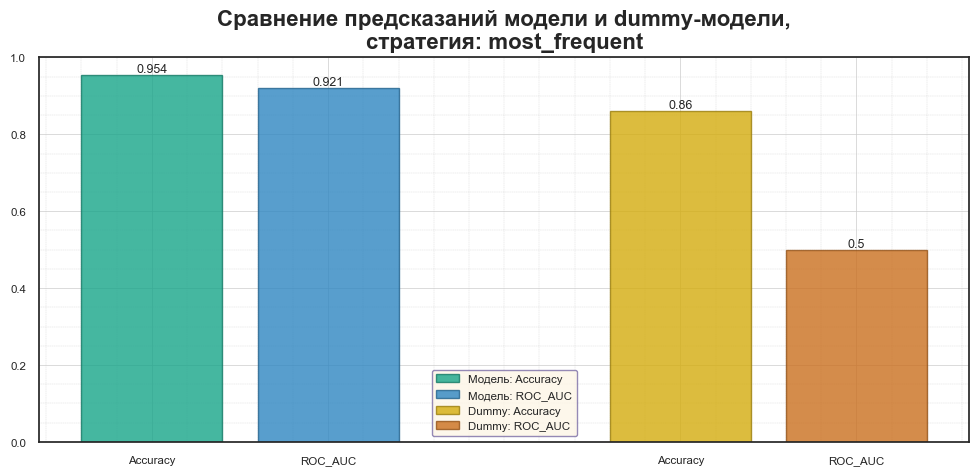

In [44]:
model_accuracy = GetFinalTable.pivot_table[GetFinalTable.pivot_table.columns[1]].iloc[-1]
model_rocauc = GetFinalTable.pivot_table[GetFinalTable.pivot_table.columns[3]].iloc[-1]
pred_tuple = (model_accuracy, model_rocauc)
model_comparison(X_train, y_train, X_test, y_test, pred_tuple)

вот так сразу наглядно видно и понятно то, что созданная нами модель работает и работает хорошо

_____

#### Предварительный вывод. На данном этапе мы:

- рассмотрели несколько вариантов алгоритмов для ML-модели и выбрали лучший по значению метрики *ROC_AUC*. Вот шаги и параметры, на основе которых была выбрана именно эта модель:
  - преобразование данных в пайплайне с применением *OHE* к категориальным переменным и RobustScaler к числовым переменным для линейных моделей (+ генерация полиномиальных признаков для некоторых алгоритмов)
  - перебор гиперпараметров для алгоритмов в *RandomizedSearchCV* с количеством итераций до 200-т и количеством фолдов = 6
  - ключевой критерий выбора - это значение метрики *ROC_AUC*, полученное на кросс-валидации
- вот такие алгоритмы были использованы:
  -  LogisticRegression
  -  StackingClassifier LogisticRegression с метамоделью LogisticRegression
  -  RandomForestClassifier
  -  CatBoostClassifier
  -  KNeighborsClassifier
  -  ещё планировался Support Vector Classification (SVC), но он в реализации от scikit-learn не работает с predict_proba
- в качестве метрик были рассмотрены:
  - основная - *ROC_AUC*
  - дополнительная - *Accuracy*
- в итоге лидером стал алгоримт *CatBoostClassifier*, показавший значение *Accuracy*=0.96 и *ROC_AUC* на кросс-валидации > 0.9, что нам подходит, так как контрольное пороговое значение *ROC_AUC* должно быть >= 0.85. К слову, все другие алгоритмы этот порог не перешагнули

$\Rightarrow$ с алгоритмом определились, модель сформировали, на неё будем опираться в исследовании важности признаков

_____

## Исследование важности признаков

так как мы знаем, что для «Ниединогоразрыва.ком» важна интерпретируемость признаков, то продолжим наше исследование и дополнительно изучим те признаки, которые при помощи библиотеки *Phik* показали корреляцию с целевой переменной и были выбраны для машинного обучения. Вот эти признаки: 

In [45]:
X_train.columns.tolist()

['paperless_billing',
 'payment_method',
 'monthly_charges',
 'senior_citizen',
 'partner',
 'usage_days',
 'active_services',
 'payment_category']

для объяснения их "важности" создадим "интерпретатор" при помощи библиотеки ```SHAP``` (SHapley Additive exPlanations), она показывает интерпретацию важности признаков для модели, помогает понять, какие признаки вносят наибольший вклад в принятие решений моделью. *SHAP* имеет в своём наборе много интересных графиков, одним из них мы воспользуемся и отрисуем влияние признаков на клиентский отток. Библиотека *SHAP* пока не умеет работать с пайплайном, но мы скормим ей из пайплайна обученную модель *CatBoostClassifier*:

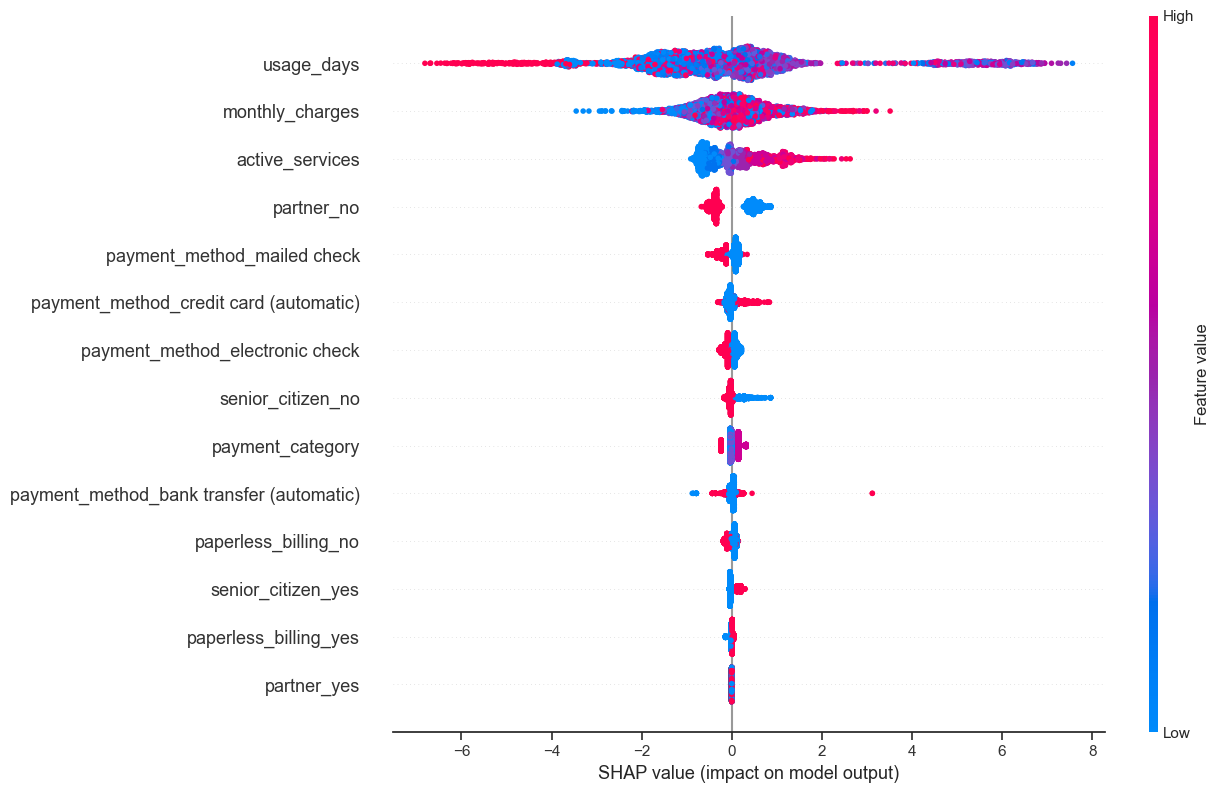

In [46]:
catboost_params = pipeline_and_predicts_list[2][1].named_steps['classifier'].get_params()
model = CatBoostClassifier(**catboost_params)
return_model_for_shap(X_train, y_train, model)

вот такие симпатичные кляксы мы получили, разберём теперь, что видим.

Каждая точка - это одно наблюдение (строка данных). Положение точки на графике соответствует SHAP-значению для данного наблюдения и признака. И важность признака можно понять так:
- признаки расположены по убыванию, сверху графика самые важные для принятия моделью решения
- слева те, что тянутся к нулю, а справа - те, что тянутся к единице, т.е. в отток
- чем больше красного, тем больше там значений (цифровых). Соответственно, бинарные признаки, как правило, просто раскрашиваются на две половинки
- чем толще клякса, тем больше в этом месте кучкуется наблюдений

по признакам:
- на графике видно, что основное влияние имеют числовые признаки, а все категориальные оказались в хвосте
- видно и то, что самым важным для модели оказался признак количества дней от даты подключения к Оператору, причём красного слева больше, что подтверждает то наблюдение, которое мы отметили и до обучение модели - "старички" менее склонны к оттоку, а значит Оператору стоит больше переживать за "новичков", их надо как-то удерживать и следить за ними внимательней
- *monthly_charges* так же показывает нам очевидную закономерность, выявленную ранее и заключающуюся в том, что дорогие оплаты за услуги Оператора не способствует удержанию и тянут пользователей в отток
- сгенерированный нами признак *active_services*, собравший в себя все доп.услуги, так же сильно влияет на модель и тоже показывает нам то, что ранее мы уже определяли - большое количество услуг напрямую влияет на отток. Одна-две услуги - это куда ни шло, но начиная с трёх активируется отток. Возможно, часть услуг продаётся в каком-то неявном виде или они не являются обязательными, но абсолютно точно то, что политику по продажам доп.услуг необходимо проверить на вменяемость
- *partner* - наличие супруга склоняет к оттоку, вот оно как))
- пенсионеры уходят в отток
- оплата по почте удерживает, а кредитка тянет в отток
- и пр. признаки уже имеют минимальный вес на модель при принятии ею решений

_____

#### Предварительный вывод. На данном этапе мы:
- использовали библиотеку *SHAP* для объяснения влияния признаков на решение об отказе от услуг Оператора связи
- выявили признаки, сильнейшим образом влияющие на принятие решения об уходе, кратко - это:
  - количество дней пользования услугами
  - стоимость услуг
  - больше 3-х дополнительных сервисов в одном пакете
  - наличие супруга))
  - списания оплат с банковских карт
 
$\Rightarrow$ в целом, на данном этапе мы не обнаружили какой-либо информации, принципиально отличной от проведённого нами ранее исследования. Но на этот раз мы подтвердили то, что выявили ранее, уже на базе обученной модели и с применением специализированных инструментов, основанных, в свою очередь, на теории игр. Можем только порадоваться за свою экспертность в вопросе интерпретации признаков, раз она так совпала с результатами *SHAP*-метода. Переходим теперь к написанию общего итогового отчёта о проделанной работе

_____

## Отчёт по проделанной работе

перед нам стояла задача разработки модели машинного обучения для оператора связи «Ниединогоразрыва.ком». Компания хочет использовать модель, отмечающую пользователей, которые могут уйти, для того, чтобы предлагать таким пользователям различные промокоды и специальные условия. Конечная цель заказчика - это сохранение прибыли за счёт удержания имеющихся клиентов.

Для достижения поставленной задачи нами была проделана работа по анализу и подготовке предоставленных в наше распоряжение данных, а именно:
- мы изучили даные из следующих файлов:
  - *contract_new.csv* - информация о договоре - дата подписания, дата расторжения. сроки и способы оплаты и т.п.
  - *internet_new.csv* - информация о дополнительных пакетах услуг - антивирус, онлайн-кинотеатр, стриминговое тв и пр.
  - *personal_new.csv* - обезличенная персональная информация, такая как: пол, семейное положение, пенсионнвй возраст
  - *phone_new.csv* - отметка о том, есть ли у пользователей возможность использования параллельных линий во время звонка
- представленные файлы были собраны в единую сводную таблицу, на базе которой и проводилась дальнейшая работа:
  - у некоторых столбцов тип данных был приведён в соответствие с ожидаемым (там, где числа, не должно быть строк, и наоборот)
  - были заполнены пропуски, образовавшиеся по причине того, что не все пользователи в едином порыве используют все предоставляемые Оператором услуги
  - других явных грубых пропусков или дубликатов в данных обнаружено не было
- данные оказались в диапазоне с октября 2013-го по февраль 2020-го года. По видимому, в самом начале своей работы «Ниединогоразрыва.ком» активно привлекали пользователей, в результате чего в начале наблюдений был заметен серьёзный пик как роста подключения новых пользователей и услуг, так потом и резкий отток клиентов, которые ещё совсем недавно были новыми. Этим событыям уже около пяти лет и они точно утратили бизнес-ценность, поэтому мы приняли решение отрезать данные, оставив диапазон значений вплоть до января 2020-го года - полного закрытого месяца. На выбранном выпрямленном диапазоне и производилось обучение модели
- для предварительного анализа данных до передачи их ML-алгоритмам на этапе ```Machine Learning Engineering``` был сгенерирован ряд новых признаков, таких как:
  - *usage_days* - количество дней пользования услугами от даты подписания контракта до 01 февраля 2020-го года (если контракт не был расторжен раньше)
  - *usage_weeks* - количество пользования услугами аналогичного периода
  - *usage_months* - количество месяцев
  - *active_services* - количество активных подключённых услуг (от 0 до 7-ми)
  - *additional_services_indicator* - дополнительный индикатор, показывающий, была ли подключена хотя бы одна услуга
  - *payment_category* - категории клиентов в зависимости от суммы ежемесячного платежа
  - некоторые сочетания социальных групп пользователей:
    - *senior_partner* - пенсионеры в браке
    - *partner_dependents* - в бранке с иждивенцами
    - *senior_male*- мужчины пенсионного возраста
    - *senior_female* - женщины пенсионного возраста
- при помощи инструментов библиотеки *Phik* мы смогли визуализировать корреляционные взаимозвязи между данными
- при исследовани взяимосвязей некоторых признаков мы использовали в том числе и статистические методы, проверяющие влияние того или иного признака на целевую переменную:
  - для категориальных признаков применили $\chi^2$ (хи квадрат), он основан на сравнении фактического наблюдаемого распределения с ожидаемым распределением, которое должно быть случайным, если нулевая гипотеза верна
  - а для числовых признаков пименили t-тест для независимых выборок, так как каждому клиенту в данных соответствует только одна метка - 0 или 1. *t-тест* основан на сравнении различия между средними значениями выборок с ожидаемым различием в случае, если нулевая гипотеза верна
  - гипотезы сформулировали следующие:
    - $H_0$ - признак не имеет влияния не целевую переменную
    - $H_1$ - признак имеет влияние не целевую переменную
  - дальнейший экспертный анализ позволил определиться с выбором признаков, которые мы оставили для машинного обучения - это признаки:
  - *paperless_billing* - безналичная ли опалата услуг (да/нет)
  - *payment_method* - способ оплаты за услуги
  - *monthly_charges* - сумма ежемесячных трат на услуги
  - *senior_citizen* - есть ли у клиента пенсионна=ый статус по возрасту (да/нет)
  - *partner* - состоит ли клиент в браке (да/нет)
  - *usage_days* - количество дней пользования услугами
  - *active_services* - количество активных услуг
  - *payment_category* - категории клиентов в зависимости от суммы ежемесячного платежа
- а для этапа ```Machine Learning Modeling``` были выбраны следующие алгоритмы:
  - *LogisticRegression*
  - *StackingClassifier LogisticRegression с метамоделью LogisticRegression*
  - *RandomForestClassifier*
  - *CatBoostClassifier*
  - *KNeighborsClassifier*
  - ещё планировался *Support Vector Classification (SVC)*, но он в реализации от scikit-learn не работает с predict_proba, поэтому от него пришлось отказаться
- лучшая модель выбиралась по параметрам:
  - преобразование данных в пайплайне с применением *OneHotEncoder*-кодирования категориальных и бинарных переменных с параметром drop='first' для предотвращения сильного "раздутия" таблицы
  - применение робастного масштабирования *RobustScaler* для числовых переменных, к которым будут применяться линейные алгоритмы
  - для поиска нелинейных взаимосвязей генерация полиномиальных признаков при помощи *PolynomialFeatures* линейных алгоритмов и KNN
  - перебор гиперпараметров для алгоритмов в *RandomizedSearchCV* с количеством итераций до 200-т и количеством фолдов = 6
- в качестве метрик были рассмотрены:
  - основная - *ROC_AUC*
  - дополнительная - *Accuracy*
  - заодно графически мы отрисовывали площадь под кривой *ROC_curve*, *TN*, *FN*, *TP*, *FP*
- ```критерий успешности алгоритма``` - значение ROC_AUC не ниже 0.85
- в результате поиска подходящего алгоритма был выбран градиентный бустинг *CatBoostClassifier* со следующими подобранными гиперпараметрами: {'classifier__thread_count': 3, 'classifier__scale_pos_weight': 1, 'classifier__learning_rate': 0.5, 'classifier__l2_leaf_reg': 10, 'classifier__iterations': 1266, 'classifier__depth': 2, 'classifier__border_count': 256, 'classifier__bagging_temperature': 5}
- итоговая проверка алгоритма на отложенной тестовой выборке показала следующие результаты:
  - ```ROC_AUC = 0.92``` - ROC_AUC как качество модели по всем возможным порогвм вероятности говорит о том, что наша модель имеет высокую способность разделять пользователей на отток и не-отток
  - ```площадь под ROC-кривой ROC_curve = 0.84```
  - ```Accuracy = 0.95``` - общая точность нашей модели до 95%
  - ```TN = 1330```
  - ```FP = 38``` - модель совершила 38 ошибок первого рода, перестраховалась и предсказала отток там, где его нет
  - ```FN = 101``` - модель совершила 101 ошибку второго рода и не заметила 101 отток
  - ```TP = 157```
- дополнительно мы сравнили выбранную модель с наивной *dummy-моделью*, предсказывающей наиболее часто встречаемый класс в обучающем наборе данных. Сравнение позволило нашей модели пройти проверку на адекватность и ещё раз доказать то, что она рабочая и с поставленными перед ней задачами успешно справляется

_____

дополнительно мы ставили перед собой задачу при реализации ML-алгоритма опираться не только на Data Science-науку, но и на бизнес-логику и здравый смысл, которые, к примеру, подсказали нам обрезать ранние месяцы из наблюдений и это в итоге улучшило качество модели. Кроме того, в процессе реализации модели нам удалось обогатить данные и это помогло нам выявить ранее незамеченные закономерности и тенденции в поведении клиентов. Мы проанализировали переданные и сгенерированные нами признаки и вот какая дополнительная полезная информация в результате этого анализа была обнаружена:

![ottok1.jpg](https://ltdfoto.ru/images/2023/09/03/ottok1.jpg)
![ottok2.jpg](https://ltdfoto.ru/images/2023/09/03/ottok2.jpg)
![ottok3.jpg](https://ltdfoto.ru/images/2023/09/03/ottok3.jpg)
![ottok4.jpg](https://ltdfoto.ru/images/2023/09/03/ottok4.jpg)

- к оттоку менее всего склонны пользователи с долгосрочными контрактами. Пользователи привыкают к сервисам и не склонны уходить, а значит Компании стоит уделять внимание маркетинговой активности в направлении "новичков", которые пока не так надёжны и стабильны
- наблюдаются какие-то трудности в способах оплаты, так как почтовые переводы и наличный расчёт за услуги Оператора удерживают пользователей, а вот оплачивающие услуги безналом (кредитными картами и автопереводами) склонны к оттоку
- уходят пользователи, платящие за услуги Оператора свыше 90 денежных единиц в месяц, при этом клиенты, платящие ниже 90 денег в месяц, уже не склонны к оттоку. Это говорит о том, что на верхнем "вип"-уровне услуг Оператор «Ниединогоразрыва.ком» явно промахивается и не учитывает эластичность спроса, которая может формироваться по большому множеству факторов, к примеру большого количества товаров-конкурентов или товаров-заменителей на рынке (как и самих конкурентов)
- у большинства пользвателей подключены какие-то доп.услуги и это же большинство склонно к оттоку. При этом по отдельности та или иная доп.услуга на отток никак не влияет, но в сумме они создают определённую картину:
  - 1-2 дополнительные услуги не отражаются на лояльности пользователей
  - с 3-х и далее услуги начинают склонять пользователей к оттоку, а это значит то, что Компании стоит болше внимание уделять пакетным предложениям услуг, делать их более кастомизированными и не перегибать с навязчивыми предложениеми. Ещё взможно такое, что часть услуг продаётся в каком-то неявном виде или они являются обязательными, что, как мы убедились, плохо. И абсолютно точно то, что политику по продажам доп.услуг необходимо проверить на вменяемость как можно скорее
- группа социальных признаков в разных комбинациях показывает некий сборный портрет пользователя:
  - пользователи в браке склонны к оттоку
  - пенсионеров среди клиентов не так много и они оттекают
  - пользователей в браке и без иждивенцев больше, чем в браке с иждивенцами. Иждивенцы как-то влияют на отток, возможно дело просто в ограниченном финансовом положении
- признак *multiple_lines* - возможность поддерживать несколько номеров на одном телефонном аппарате и совершения с них звонков в одно время. Наличие данной опции склоняет пользователей к оттоку и компании стоит пересмотреть подход к ней.
- согласно стат.методам на отток влияют только категория клиента, ежемесячные траты и количество подключенных доп.услуг, остальные признаки с вероятностью в 95% не имеют влияния на отток

_____

**Что могло помешать исследованию:**
- В целом, модель показала хороший результат, но для его правильной интепретации необходимы бизнес-показатели и метрики, к примеру, стоимость промокода или стоимость потери клиента. Так мы смогли бы более выревенно интерпретировать не только результаты работы модели, но и настроить её ещё на этапе обучения под соответствующий порог вероятности классификации
- обнаружены некоторые аномалии в данных, такие как:
  - резкий всплеск подключений, а за ним следом оттока в начале 2014-го года
  - в максимальных значениях сетября, октября и ноября 2019-го года, т.е. в то время, когда мы впервые за несколько лет стали наблюдать рост подключений, количество новых абонентов одинаковое - по 237 шт. Если это случайность, то случайность, граничащая с чудом. Скорее всего, мы имеем дело с каким-то искусственным срезом значений или техническим сбоем. А эти месяцы, как одни из самых свежих к датам редсказания, нам крайне важны. Этот вопрос стоит уточнять у специалистов Ниединогоразрыва
- *multiple_lines* - возможность поддерживать несколько номеров на одном телефонном аппарате и совершения с них звонков в одно время. Наличие данной опции склоняет пользователей к оттоку, а у нас, к сожалению, недостаточно детальной информации об этой услуге для того, чтобы верно интерпретировать её. Вариантов два:
  - речь идёт о многоканальном домашнем телефоне, тогда можнно смело заявлять о потере актуальности в данном предложении, XXI век на дворе
  - речь идёт о бизнес-предложении, предполагающем два номера на один мобильный телефон с какими-то дополнительными условиями. К примеру, это могут быть личный номер и номер для бизнеса. Тогда предложение должно быть интересно узкой аудитории бизнес-пользователей, которым важно оставаться на связи и отделять личные звонки от рабочих. Если multiple_lines об этом, то стоит проверить цены на услугу и промониторить аналогичные предложения от конкурентов, кто-то явно предлагает услугу multiple_lines по более выгодным ставкам
- недосточность персональной информации не позволяет чётко поделить пользователей на когорты. К примеру, из возраста у нас есть только флаг на пенсионную группу (да/нет)
- без информации о конкурентах никак нельзя качественно оценить ситуацию на рынке в целом, которая бы отлично подсказала причины поведеня пользователей
- да и в целом, любая другая дополнительная информация не помешала бы, если не модели, так хотя бы нам для более глубокого погружения в рынок интернет-операторов и телефоний

_____

Все недостающие информациолнные нюансы и тонкости бизнеса в процессе всегда можно уточнить и, при необходимости, дообучить модель. И совершенно верно то, что уже сейчас мы можем смело утверждать - разработанная нами модель после её внедрения принесёт значительную бизнес-пользу и станет незаменимым инструментом в удержании пользователей для Оператора связи «Ниединогоразрыва.ком», повысит его конкурентноспособность, сделает инновационным лиднером в своей отрасли и, конечно, позволит и сохранять и приумножать доход.

In [47]:
cowsay.daemon('ПОРВЁМ КОНКУРЕНТОВ!)')

  ____________________
| ПОРВЁМ КОНКУРЕНТОВ!) |
                            \
                             \
                              \
                               \
                                /- _  `-/  '
                               (/\/ \ \   /\
                               / /   | `    \
                               O O   ) /    |
                               `-^--'`<     '
                              (_.)  _  )   /
                               `.___/`    /
                                 `-----' /
                    <----.     __ / __   \
                    <----|====O)))==) \) /====
                    <----'    `--' `.__,' \
                                 |        |
                                  \       /
                            ______( (_  / \______
                          ,'  ,-----'   |        \
                          `--{__________)        \/


_____